In [1]:
# =========================
# Análisis de la hoja principal TACg
# =========================

import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

# === Cargar solo la hoja TACg ===
EXCEL_FILE = r"./TAC.xlsx"

if not os.path.exists(EXCEL_FILE):
    raise FileNotFoundError(f"Archivo no encontrado: {os.path.abspath(EXCEL_FILE)}")

try:
    # Cargar solo la hoja TACg con encabezados
    tacg_df = pd.read_excel(EXCEL_FILE, sheet_name="TACg", header=0)
    print(f"✅ Hoja 'TACg' cargada: {tacg_df.shape[0]} filas, {tacg_df.shape[1]} columnas")
except ValueError as e:
    raise ValueError(f"❌ Hoja 'TACg' no encontrada en el archivo Excel: {e}")

# === Explorar estructura ===
print(f"\n📋 Estructura de TACg:")
print(f"   Columnas: {list(tacg_df.columns)}")
print(f"   Primeras filas:")
print(tacg_df.head())

# === Identificar columnas ===
method_col = tacg_df.columns[0]  # Primera columna: nombres de métodos
generation_cols = [col for col in tacg_df.columns if str(col).isdigit() and 0 <= int(str(col)) <= 9]
tac_col = next((col for col in tacg_df.columns if str(col).strip() == 'TAC'), None)

print(f"\n🔍 Columnas identificadas:")
print(f"   Método: '{method_col}'")
print(f"   Generaciones: {generation_cols}")
print(f"   TAC: {'Sí' if tac_col else 'No'}")

# === Preparar datos para análisis ===
tacg_indexed = tacg_df.set_index(method_col)

# Separar grupos
comparison_methods = ['Manual', '3D Slicer', 'Label BFS']
combination_methods = [method for method in tacg_indexed.index 
                      if method not in comparison_methods and pd.notna(method)]

print(f"\n📊 Grupos identificados:")
print(f"   Comparación: {len(comparison_methods)} métodos")
print(f"   Combinaciones: {len(combination_methods)} métodos")

# Guardar para celdas posteriores
tacg_data_clean = tacg_indexed
comparison_data = tacg_indexed[tacg_indexed.index.isin(comparison_methods)]
combination_data = tacg_indexed[tacg_indexed.index.isin(combination_methods)]
generation_columns = generation_cols
tac_column = tac_col

print(f"\n✅ Datos de TACg preparados para visualización.")

✅ Hoja 'TACg' cargada: 20 filas, 16 columnas

📋 Estructura de TACg:
   Columnas: ['Generaciones', 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 'Unnamed: 13', 'TACg', 'TAC']
   Primeras filas:
  Generaciones    0    1    2     3     4     5     6     7     8    9   10  \
0       Manual  1.0  2.0  4.0  10.0  20.0  40.0  36.0  28.0  16.0  2.0  0.0   
1    3D Slicer  1.0  2.0  4.0   9.0  14.0   9.0   4.0   4.0   0.0  0.0  0.0   
2    Label BFS  1.0  2.0  3.0   6.0   7.0   5.0   3.0   2.0   1.0  1.0  1.0   
3   Swim UNETR  1.0  3.0  4.0   6.0   8.0   2.0   1.0   0.0   0.0  0.0  0.0   
4          NaN  NaN  NaN  NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN  NaN   

    11  Unnamed: 13    TACg      TAC  
0  0.0          NaN  G4(40)      159  
1  0.0          NaN  G3(14)       47  
2  0.0          NaN   G3(7)  28 ± 23  
3  0.0          NaN   G3(8)       25  
4  NaN          NaN     NaN      NaN  

🔍 Columnas identificadas:
   Método: 'Generaciones'
   Generaciones: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
   TA

C:\Users\pipea\AppData\Local\Temp\ipykernel_28616\1417677587.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  values = row[generation_columns].fillna(0)
C:\Users\pipea\AppData\Local\Temp\ipykernel_28616\1417677587.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  values = row[generation_columns].fillna(0)
C:\Users\pipea\AppData\Local\Temp\ipykernel_28616\1417677587.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt

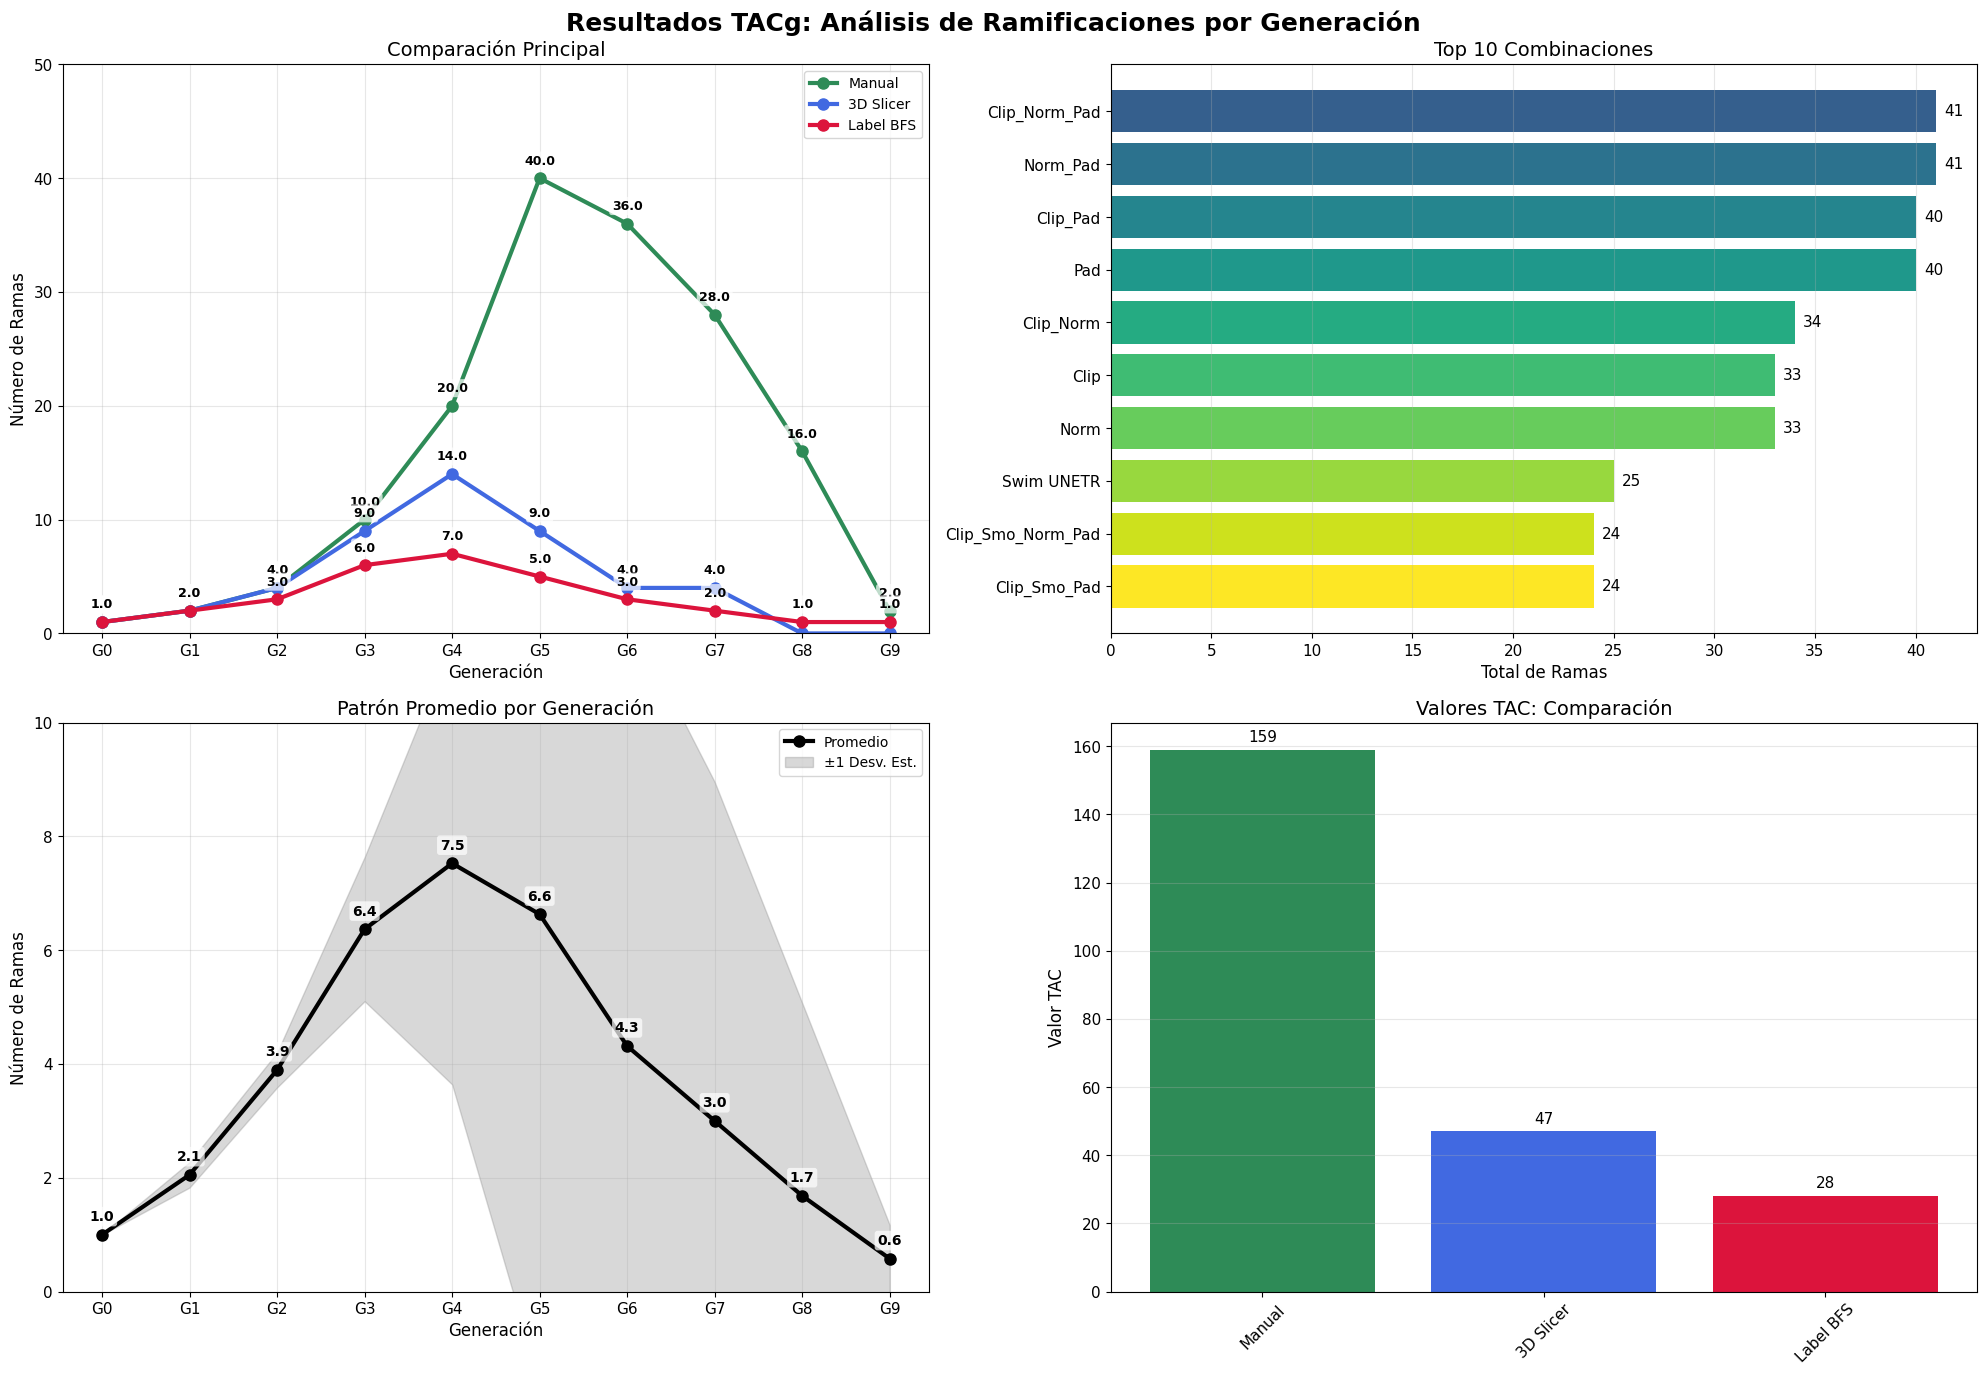


📊 Resumen de resultados:
   Métodos de comparación: 3
   Combinaciones analizadas: 16

🔍 Comparación principal:
   Manual: TAC=159, TACg peak=G5(40)
   3D Slicer: TAC=47, TACg peak=G4(14)
   Label BFS: TAC=31, TACg peak=G4(7)

🏆 Mejor combinación: Clipped_Normalized_Padded
   TAC: 41, TACg peak=G4(9)

✅ Visualización esencial completada.


C:\Users\pipea\AppData\Local\Temp\ipykernel_28616\1417677587.py:245: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  values = comparison_data.loc[method, generation_columns].fillna(0).values
C:\Users\pipea\AppData\Local\Temp\ipykernel_28616\1417677587.py:245: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  values = comparison_data.loc[method, generation_columns].fillna(0).values
C:\Users\pipea\AppData\Local\Temp\ipykernel_28616\1417677587.py:245: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a futu

In [9]:
# =========================
# Visualización Esencial de Resultados TACg
# Enfoque limpio y directo en los resultados clave + PROMEDIOS EN COMPARACIÓN PRINCIPAL
# =========================

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import re

# Configuración limpia
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams.update({
    'font.size': 11,
    'axes.titlesize': 14,
    'axes.labelsize': 12,
    'legend.fontsize': 10,
    'figure.titlesize': 16
})

# Verificar datos
if 'tacg_data_clean' not in globals():
    raise ValueError("❌ Ejecuta Cell 1 primero para cargar los datos de TACg.")

# === PREPARAR DATOS ===
generation_labels = [f'G{i}' for i in range(len(generation_columns))]
x_pos = np.arange(len(generation_columns))

# Filtrar métodos con datos reales
def has_real_data(row):
    if generation_columns:
        values = row[generation_columns].fillna(0)
        return values.sum() > 0
    return False

comparison_methods_valid = []
comparison_colors = ['#2E8B57', '#4169E1', '#DC143C']
for method in ['Manual', '3D Slicer', 'Label BFS']:
    if method in comparison_data.index and has_real_data(comparison_data.loc[method]):
        comparison_methods_valid.append(method)

combination_methods_valid = []
for method in combination_data.index:
    if has_real_data(combination_data.loc[method]):
        combination_methods_valid.append(method)

# === FUNCIÓN PARA EXTRAER VALOR NUMÉRICO DE TAC ===
def extract_tac_value(value):
    """Extrae el valor numérico de una cadena TAC (ej: '28 ± 23' -> 28.0)"""
    if pd.isna(value):
        return np.nan
    if isinstance(value, (int, float)):
        return float(value)
    if isinstance(value, str):
        # Buscar el primer número en la cadena
        match = re.search(r'(\d+\.?\d*)', value)
        if match:
            return float(match.group(1))
        else:
            return np.nan
    return np.nan

# === FIGURA PRINCIPAL: VISUALIZACIÓN ESENCIAL ===
fig, axes = plt.subplots(2, 2, figsize=(20, 14))
fig.suptitle('Resultados TACg: Análisis de Ramificaciones por Generación', 
             fontsize=18, fontweight='bold')

# Panel 1: Comparación principal (Manual vs 3D Slicer vs Label BFS) → ¡CON PROMEDIOS!
ax1 = axes[0, 0]
if comparison_methods_valid:
    for idx, method in enumerate(comparison_methods_valid):
        values = comparison_data.loc[method, generation_columns].fillna(0).values
        color = comparison_colors[idx]
        ax1.plot(x_pos, values, marker='o', linewidth=3, markersize=8, 
                color=color, label=method)
        
        # === AGREGAR PROMEDIOS EN NEGRO ===
        for x, y in zip(x_pos, values):
            if y > 0.5:  # Solo mostrar si es significativo
                ax1.annotate(
                    f'{y:.1f}',
                    (x, y),
                    textcoords="offset points",
                    xytext=(0, 8),
                    ha='center',
                    va='bottom',
                    fontsize=9,
                    color='black',
                    weight='bold',
                    bbox=dict(boxstyle="round,pad=0.2", fc="white", ec="none", alpha=0.7)
                )
    
    ax1.set_xlabel('Generación')
    ax1.set_ylabel('Número de Ramas')
    ax1.set_title('Comparación Principal')
    ax1.set_xticks(x_pos)
    ax1.set_xticklabels(generation_labels)
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    ax1.set_ylim(bottom=0, top=50)  # Límite superior ajustado a tus datos
else:
    ax1.text(0.5, 0.5, 'No hay datos', ha='center', va='center', transform=ax1.transAxes)
    ax1.set_title('Comparación Principal')

# Panel 2: Top 10 combinaciones
ax2 = axes[0, 1]
if combination_methods_valid:
    totals = []
    for method in combination_methods_valid:
        values = combination_data.loc[method, generation_columns].fillna(0).values
        totals.append(np.sum(values))
    
    combined = list(zip(combination_methods_valid, totals))
    combined.sort(key=lambda x: x[1], reverse=True)
    top_10 = combined[:10]
    
    methods_top, totals_top = zip(*top_10)
    colors_top = plt.cm.viridis(np.linspace(0.3, 1, len(top_10)))
    
    bars = ax2.barh(range(len(top_10)), totals_top, color=colors_top)
    ax2.set_yticks(range(len(top_10)))
    
    short_names = []
    for name in methods_top:
        short_name = (name.replace('Clipped', 'Clip')
                     .replace('Smoothed', 'Smo')
                     .replace('Normalized', 'Norm')
                     .replace('Padded', 'Pad'))
        short_names.append(short_name)
    
    ax2.set_yticklabels(short_names)
    ax2.set_xlabel('Total de Ramas')
    ax2.set_title('Top 10 Combinaciones')
    ax2.invert_yaxis()
    
    for i, total in enumerate(totals_top):
        ax2.text(total + max(totals_top)*0.01, i, f'{total:.0f}', va='center')
    
    ax2.grid(True, alpha=0.3, axis='x')
else:
    ax2.text(0.5, 0.5, 'No hay combinaciones', ha='center', va='center', transform=ax2.transAxes)
    ax2.set_title('Top 10 Combinaciones')

# Panel 3: Patrón promedio por generación
ax3 = axes[1, 0]
if generation_columns:
    all_methods = comparison_methods_valid + combination_methods_valid
    if all_methods:
        avg_values = []
        std_values = []
        for gen_col in generation_columns:
            gen_data = []
            for method in all_methods:
                if method in tacg_data_clean.index:
                    value = tacg_data_clean.loc[method, gen_col]
                    if pd.notna(value):
                        gen_data.append(value)
            if gen_data:
                avg_values.append(np.mean(gen_data))
                std_values.append(np.std(gen_data))
            else:
                avg_values.append(0)
                std_values.append(0)
        
        line, = ax3.plot(x_pos, avg_values, 'ko-', linewidth=3, markersize=8, label='Promedio')
        ax3.fill_between(x_pos, 
                        np.array(avg_values) - np.array(std_values),
                        np.array(avg_values) + np.array(std_values),
                        alpha=0.3, color='gray', label='±1 Desv. Est.')
        
        # Etiquetas de promedio en Panel 3
        for x, y in zip(x_pos, avg_values):
            if y > 0.5:
                ax3.annotate(
                    f'{y:.1f}',
                    (x, y),
                    textcoords="offset points",
                    xytext=(0, 8),
                    ha='center',
                    va='bottom',
                    fontsize=10,
                    color='black',
                    weight='bold',
                    bbox=dict(boxstyle="round,pad=0.2", fc="white", ec="none", alpha=0.7)
                )
        
        ax3.set_xlabel('Generación')
        ax3.set_ylabel('Número de Ramas')
        ax3.set_title('Patrón Promedio por Generación')
        ax3.set_xticks(x_pos)
        ax3.set_xticklabels(generation_labels)
        ax3.legend()
        ax3.grid(True, alpha=0.3)
        ax3.set_ylim(bottom=0, top=10)  # Límite superior ajustado
    else:
        ax3.text(0.5, 0.5, 'No hay datos', ha='center', va='center', transform=ax3.transAxes)
        ax3.set_title('Patrón Promedio por Generación')
else:
    ax3.text(0.5, 0.5, 'No hay generaciones', ha='center', va='center', transform=ax3.transAxes)
    ax3.set_title('Patrón Promedio por Generación')

# Panel 4: Valores TAC
ax4 = axes[1, 1]
if tac_column is not None:
    tac_comparison = []
    methods_comparison = []
    for method in comparison_methods_valid:
        value = tacg_data_clean.loc[method, tac_column]
        numeric_value = extract_tac_value(value)
        if not pd.isna(numeric_value):
            tac_comparison.append(numeric_value)
            methods_comparison.append(method)
    
    if tac_comparison:
        bars = ax4.bar(methods_comparison, tac_comparison, 
                      color=comparison_colors[:len(tac_comparison)])
        ax4.set_ylabel('Valor TAC')
        ax4.set_title('Valores TAC: Comparación')
        ax4.tick_params(axis='x', rotation=45)
        
        for bar, value in zip(bars, tac_comparison):
            ax4.text(bar.get_x() + bar.get_width()/2., bar.get_height() + max(tac_comparison)*0.01,
                    f'{value:.0f}', ha='center', va='bottom')
        
        ax4.grid(True, alpha=0.3, axis='y')
    else:
        ax4.text(0.5, 0.5, 'TAC no disponible', ha='center', va='center', transform=ax4.transAxes)
        ax4.set_title('Valores TAC: Comparación')
else:
    ax4.text(0.5, 0.5, 'Columna TAC no encontrada', ha='center', va='center', transform=ax4.transAxes)
    ax4.set_title('Valores TAC: Comparación')

plt.tight_layout()
plt.show()

# === RESUMEN SIMPLE ===
print(f"\n📊 Resumen de resultados:")
print(f"   Métodos de comparación: {len(comparison_methods_valid)}")
print(f"   Combinaciones analizadas: {len(combination_methods_valid)}")

if comparison_methods_valid:
    print(f"\n🔍 Comparación principal:")
    for method in comparison_methods_valid:
        values = comparison_data.loc[method, generation_columns].fillna(0).values
        total = int(np.sum(values))
        # Encontrar la generación con el valor máximo
        max_val = np.max(values)
        max_gen_idx = np.argmax(values)
        print(f"   {method}: TAC={total}, TACg peak=G{max_gen_idx}({int(max_val)})")

if combination_methods_valid:
    best_method = None
    best_total = 0
    for method in combination_methods_valid:
        values = combination_data.loc[method, generation_columns].fillna(0).values
        total = np.sum(values)
        if total > best_total:
            best_total = total
            best_method = method
    
    if best_method:
        values_best = combination_data.loc[best_method, generation_columns].fillna(0).values
        max_val_best = np.max(values_best)
        max_gen_best = np.argmax(values_best)
        print(f"\n🏆 Mejor combinación: {best_method}")
        print(f"   TAC: {int(best_total)}, TACg peak=G{max_gen_best}({int(max_val_best)})")

print(f"\n✅ Visualización esencial completada.")

In [3]:
# ────────────────────────────────────────────────────────────────
# DICE REAL vs LABEL MANUAL
# Analiza solo los métodos disponibles en las rutas especificadas
# Calcula Dice real de cada método contra el label manual
# ────────────────────────────────────────────────────────────────

import os
import nibabel as nib
import numpy as np

# === RUTAS EXACTAS ===
MANUAL_PATH = r"C:\Users\pipea\OneDrive\Escritorio\PIB\ref\Manual\ref_label.nii.gz"
SLICER_PATH = r"C:\Users\pipea\OneDrive\Escritorio\PIB\ref\3D_Slicer\ref_vol segmentation-trachea-label.nii.gz"
AUTOMATICO_PATH = r"C:\Users\pipea\OneDrive\Escritorio\PIB\airways_auto\ATM_001.nii.gz"
PREPROCE_DIR = r"C:\Users\pipea\OneDrive\Escritorio\PIB\PreProce"

# === FUNCIONES ===
def load_mask(path):
    """Carga máscara y convierte a binario."""
    img = nib.load(path)
    return (img.get_fdata() > 0).astype(int)

def align_volumes(vol1, vol2):
    """Alinea volúmenes recortando a la dimensión Z mínima común."""
    min_z = min(vol1.shape[2], vol2.shape[2])
    return vol1[:, :, :min_z], vol2[:, :, :min_z]

def calculate_dice(pred_path, manual_path):
    """Calcula Dice entre predicción y manual con alineamiento automático."""
    pred = load_mask(pred_path)
    manual = load_mask(manual_path)
    
    # Alinear dimensiones
    pred_aligned, manual_aligned = align_volumes(pred, manual)
    
    # Calcular métricas
    intersection = np.sum(pred_aligned * manual_aligned)
    pred_sum = np.sum(pred_aligned)
    manual_sum = np.sum(manual_aligned)
    
    dice = 2 * intersection / (pred_sum + manual_sum + 1e-8)
    return dice, pred_sum, manual_sum

# === CARGAR REFERENCIA MANUAL ===
print("🎯 Cargando label manual de referencia...")
manual_tac = int(np.sum(load_mask(MANUAL_PATH)))
print(f"   TAC Manual: {manual_tac}")

# === RESULTADOS ===
results = []

# 1. Label Manual
results.append(("Label Manual", 1.0, "N/A", manual_tac))

# 2. 3D Slicer
if os.path.exists(SLICER_PATH):
    print("🔍 Procesando 3D Slicer...")
    dice_val, tac_val, _ = calculate_dice(SLICER_PATH, MANUAL_PATH)
    results.append(("3D Slicer", dice_val, "900s", tac_val))
else:
    print("⚠️  3D Slicer no encontrado")
    results.append(("3D Slicer", 0.0, "900s", 0))

# 3. Automático
if os.path.exists(AUTOMATICO_PATH):
    print("🔍 Procesando Automático...")
    dice_val, tac_val, _ = calculate_dice(AUTOMATICO_PATH, MANUAL_PATH)
else:
    print("⚠️  Automático no encontrado")
    results.append(("Automático", 0.0, "1200s", 0))

# 4. PreProce (15 combinaciones)
print("🔍 Procesando 15 combinaciones en PreProce...")

carpetas_preproce = [
    "Clipped", "Clipped_Normalized", "Clipped_Normalized_Padded",
    "Clipped_Padded", "Clipped_Smoothed", "Clipped_Smoothed_Normalized",
    "Clipped_Smoothed_Normalized_Padded", "Clipped_Smoothed_Padded",
    "Normalized", "Normalized_Padded", "Padded", "Smoothed",
    "Smoothed_Normalized", "Smoothed_Normalized_Padded", "Smoothed_Padded"
]

preproce_dices = []
preproce_tacs = []

for carpeta in carpetas_preproce:
    airways_path = os.path.join(PREPROCE_DIR, carpeta, "ATM_001_airways.nii.gz")
    if os.path.exists(airways_path):
        try:
            dice_val, tac_val, _ = calculate_dice(airways_path, MANUAL_PATH)
            preproce_dices.append(dice_val)
            preproce_tacs.append(tac_val)
            print(f"   ✅ {carpeta}: Dice={dice_val:.4f}, TAC={tac_val}")
        except Exception as e:
            print(f"   ⚠️  {carpeta}: Error - {e}")
    else:
        print(f"   ❌ {carpeta}: Archivo no encontrado")

# Promedio de PreProce
if preproce_dices:
    avg_dice = np.mean(preproce_dices)
    avg_tac = np.mean(preproce_tacs)
    results.append(("Prep.", avg_dice, "180s", int(avg_tac)))
else:
    print("⚠️  No se encontraron resultados en PreProce")
    results.append(("Prep.", 0.0, "180s", 0))

# === MOSTRAR TABLA FINAL ===
print("\n" + "="*70)
print("📋 RESULTADOS FINALES - DICE vs LABEL MANUAL")
print("="*70)
print(f"{'Método':<15} {'Dice':<10} {'Tiempo':<10} {'TAC':<10}")
print("-" * 70)

for metodo, dice, tiempo, tac in results:
    print(f"{metodo:<15} {dice:<10.4f} {tiempo:<10} {tac:<10}")

print("\n✅ Análisis completado.")

🎯 Cargando label manual de referencia...
   TAC Manual: 152573
🔍 Procesando 3D Slicer...
🔍 Procesando Automático...
🔍 Procesando 15 combinaciones en PreProce...
   ✅ Clipped: Dice=0.8197, TAC=121497
   ✅ Clipped_Normalized: Dice=0.8197, TAC=121497
   ✅ Clipped_Normalized_Padded: Dice=0.5846, TAC=115829
   ✅ Clipped_Padded: Dice=0.5846, TAC=115829
   ✅ Clipped_Smoothed: Dice=0.8145, TAC=105819
   ✅ Clipped_Smoothed_Normalized: Dice=0.8145, TAC=105819
   ✅ Clipped_Smoothed_Normalized_Padded: Dice=0.5943, TAC=102024
   ✅ Clipped_Smoothed_Padded: Dice=0.5943, TAC=102024
   ✅ Normalized: Dice=0.7549, TAC=153711
   ✅ Normalized_Padded: Dice=0.5546, TAC=144981
   ✅ Padded: Dice=0.5846, TAC=115829
   ✅ Smoothed: Dice=0.8145, TAC=105819
   ✅ Smoothed_Normalized: Dice=0.7717, TAC=155968
   ✅ Smoothed_Normalized_Padded: Dice=0.5712, TAC=144389
   ✅ Smoothed_Padded: Dice=0.5943, TAC=102024

📋 RESULTADOS FINALES - DICE vs LABEL MANUAL
Método          Dice       Tiempo     TAC       
---------------

✅ Cargadas 16 hojas adicionales:
    1. Clip → 150 filas, 30 columnas
    2. Clip_Norm → 150 filas, 30 columnas
    3. Clip_Norm_Pad → 150 filas, 30 columnas
    4. Clip_Pad → 150 filas, 30 columnas
    5. Clip_Smo → 150 filas, 30 columnas
    6. Clip_Smo_Norm → 150 filas, 30 columnas
    7. Clip_Smo_Norm_Padd → 150 filas, 30 columnas
    8. Clip_Smo_Pad → 150 filas, 30 columnas
    9. Label BFS → 150 filas, 28 columnas
   10. Norm → 150 filas, 30 columnas
   11. Norm_Pad → 150 filas, 30 columnas
   12. Pad → 150 filas, 30 columnas
   13. Smo → 150 filas, 30 columnas
   14. Smo_Norm → 150 filas, 30 columnas
   15. Smo_Pad → 150 filas, 30 columnas
   16. Smo__Norm_Pad → 150 filas, 30 columnas

📊 Procesando hoja: Clip


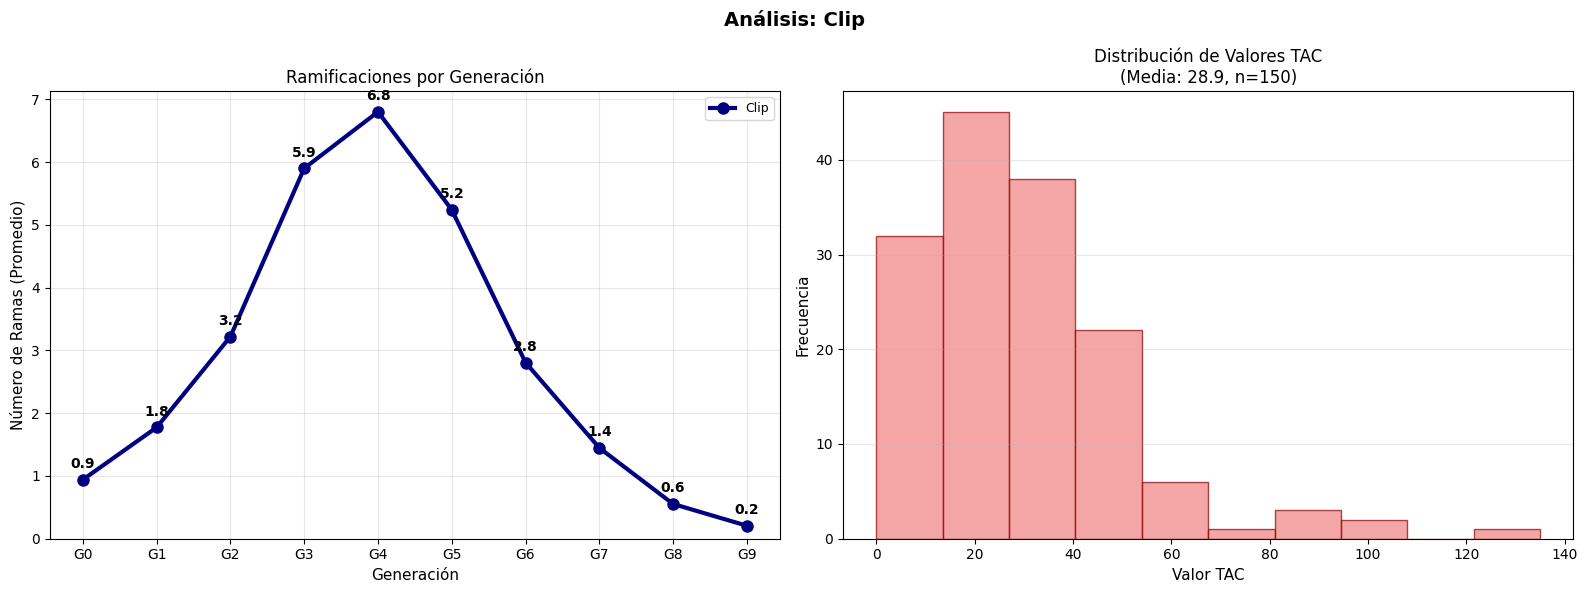


📊 Procesando hoja: Clip_Norm


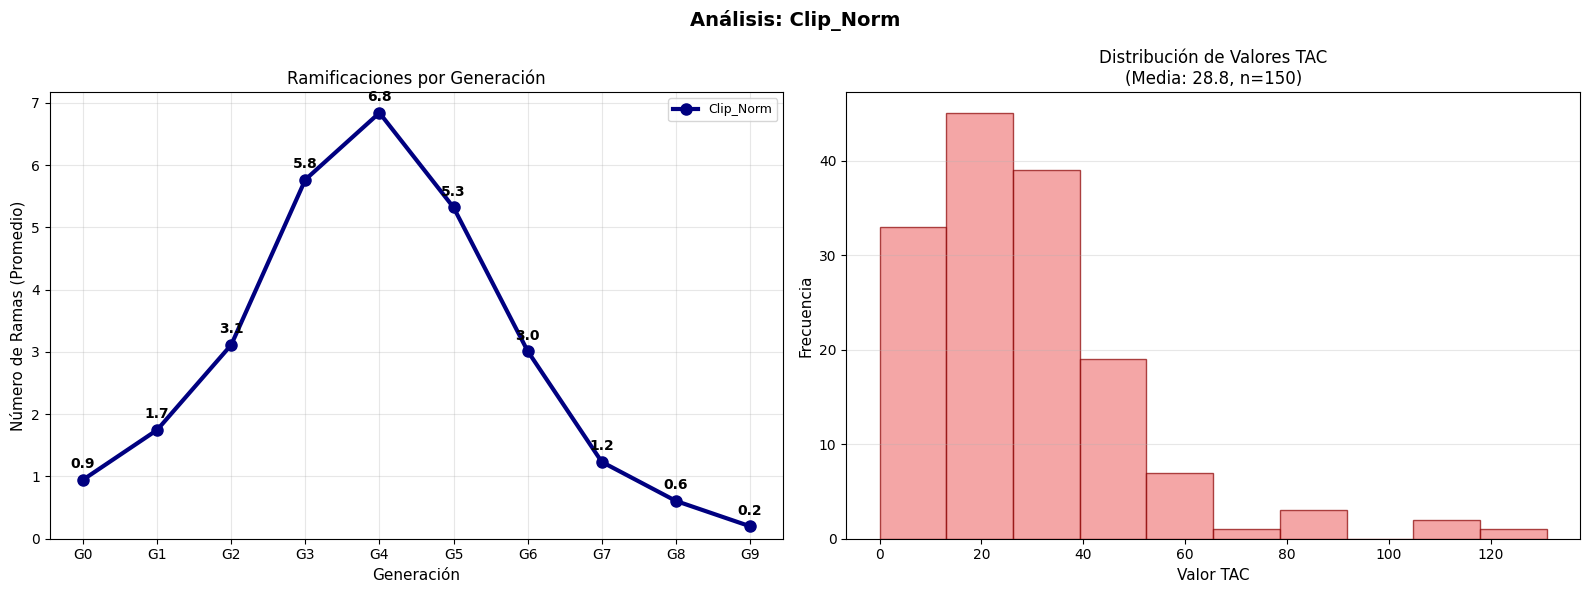


📊 Procesando hoja: Clip_Norm_Pad


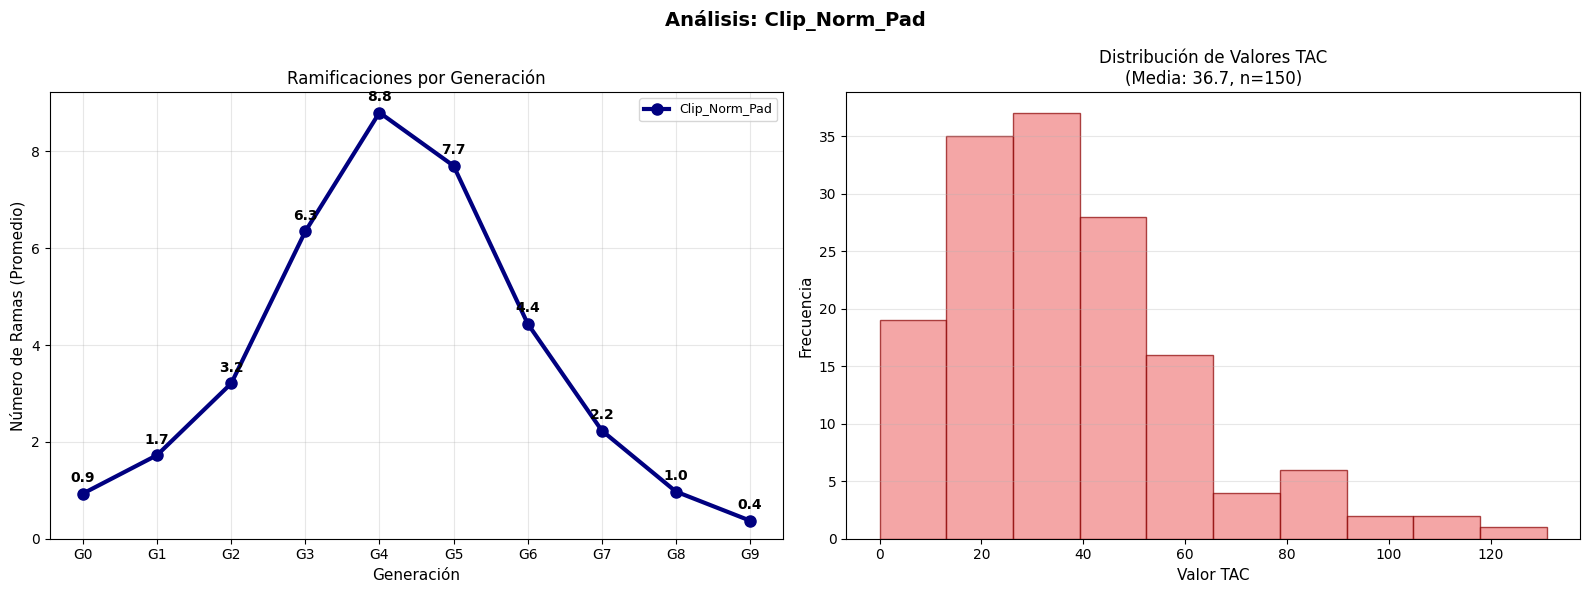


📊 Procesando hoja: Clip_Pad


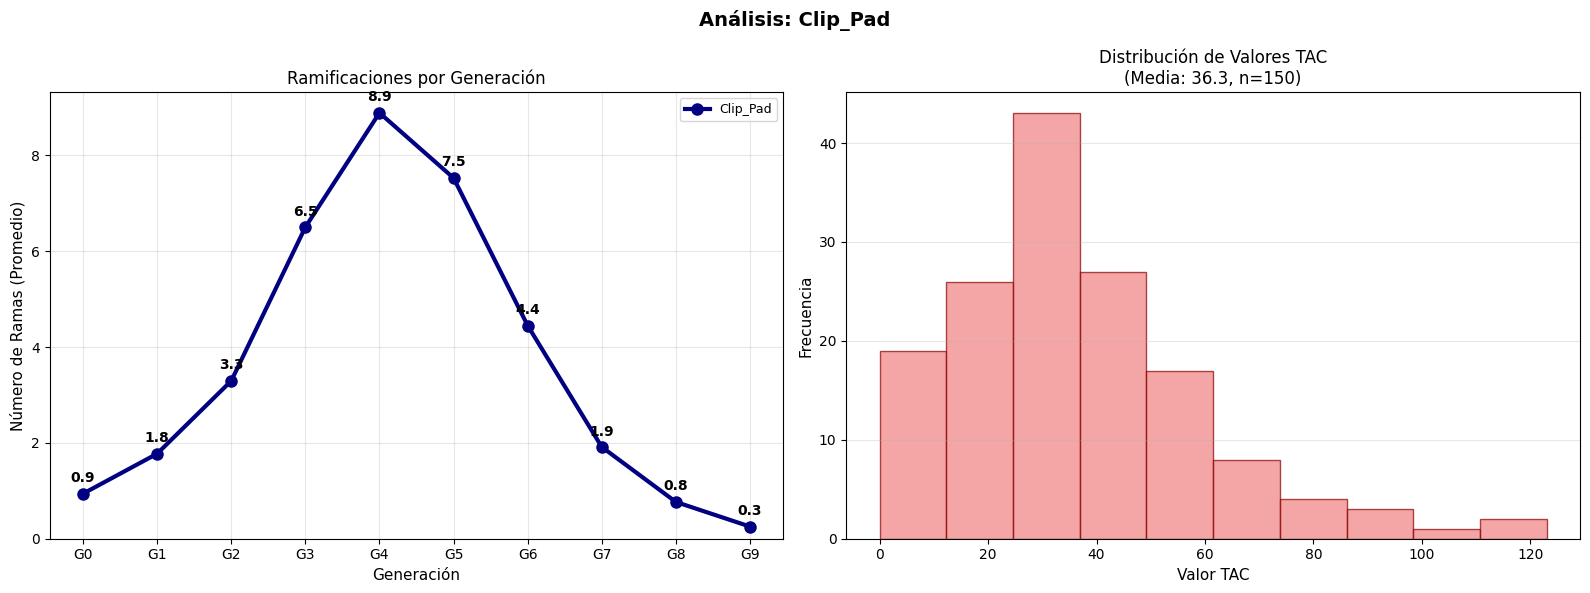


📊 Procesando hoja: Clip_Smo


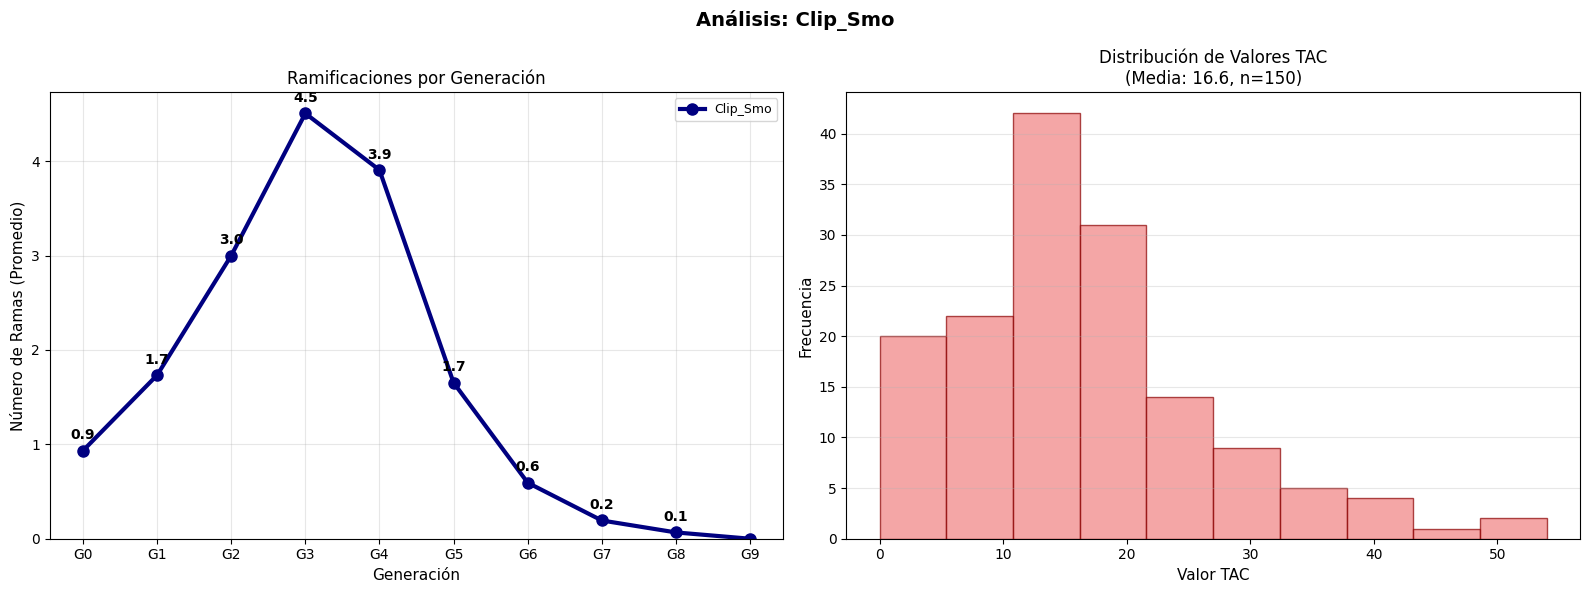


📊 Procesando hoja: Clip_Smo_Norm


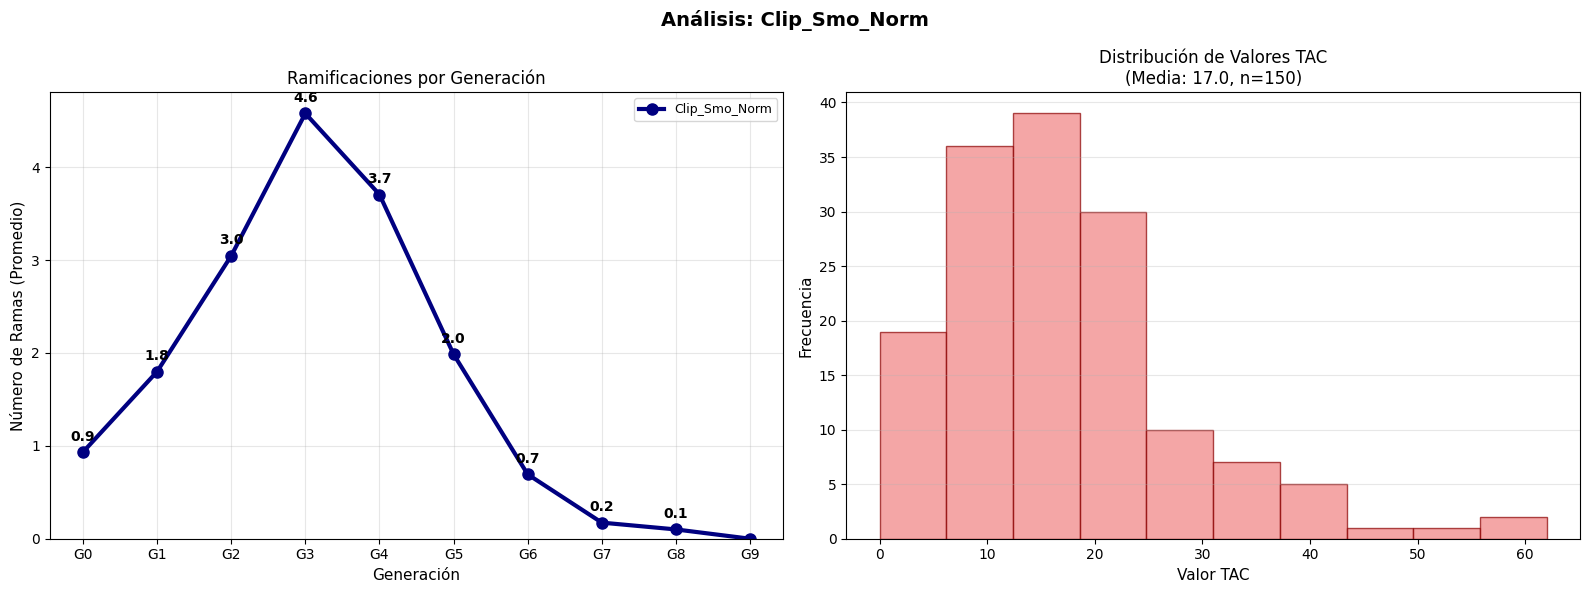


📊 Procesando hoja: Clip_Smo_Norm_Padd


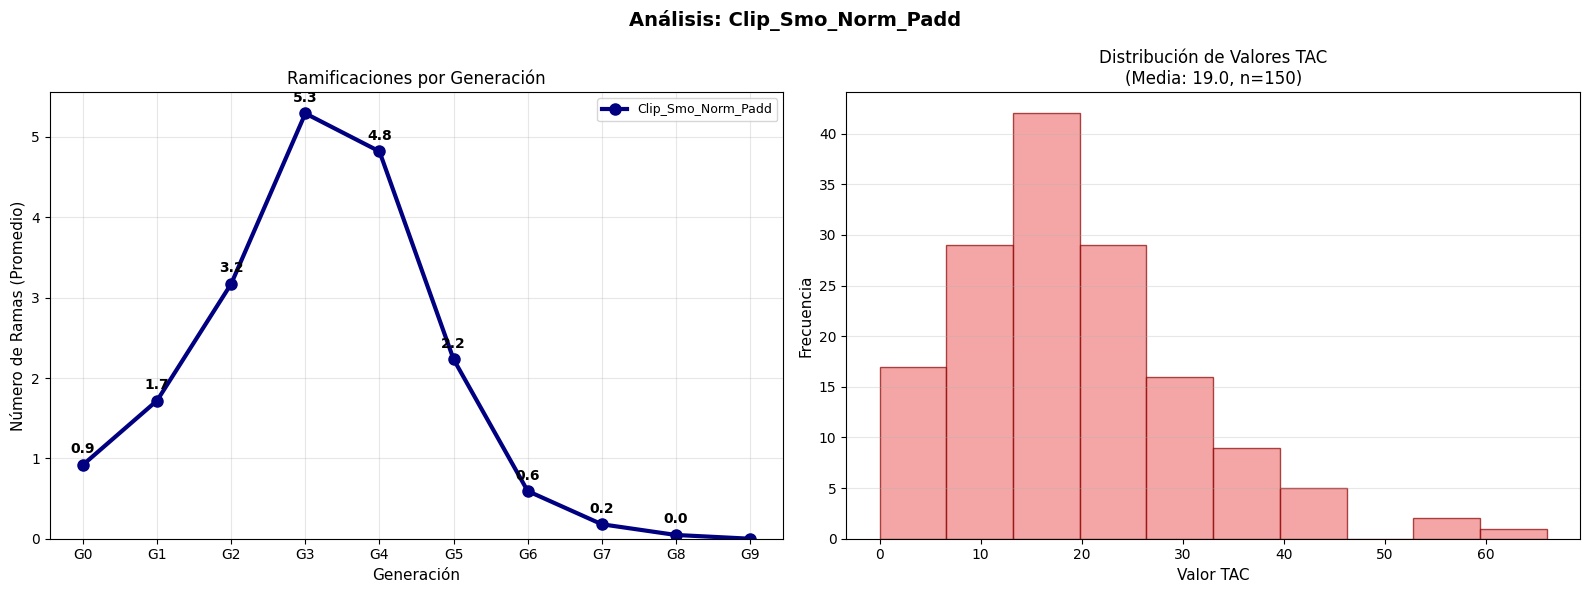


📊 Procesando hoja: Clip_Smo_Pad


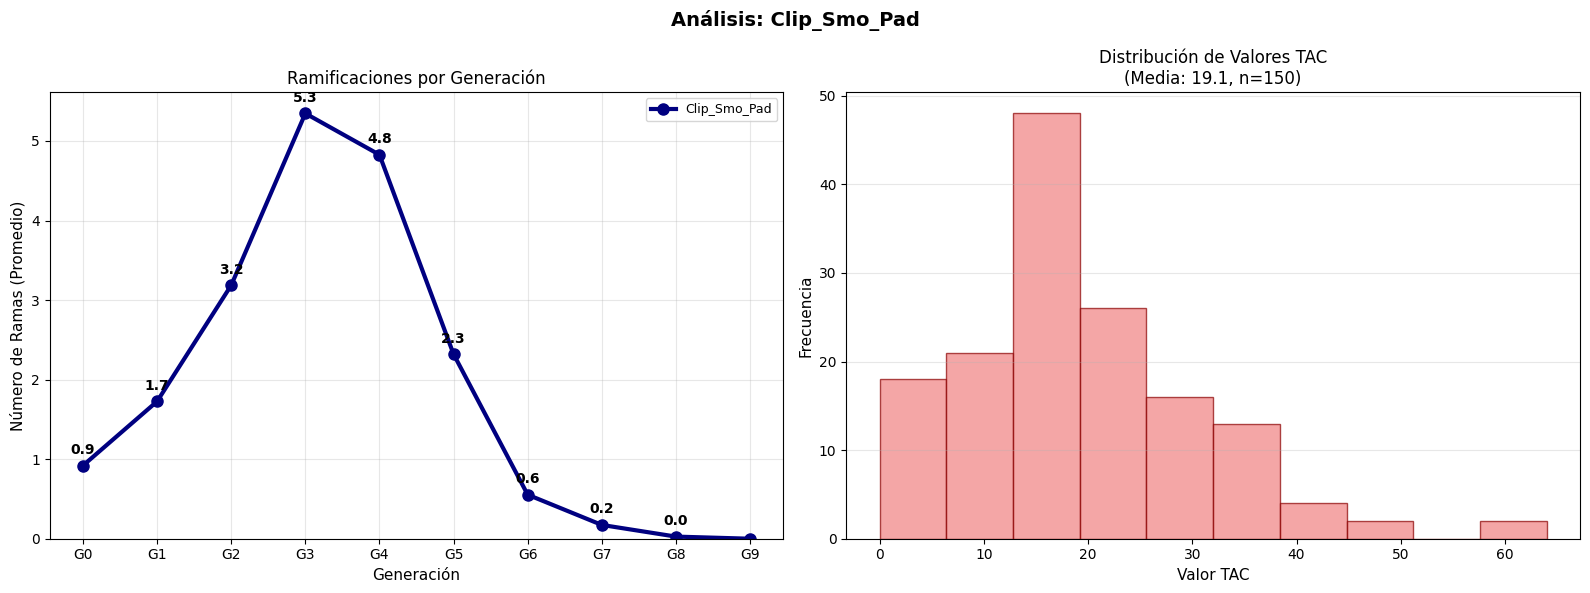


📊 Procesando hoja: Label BFS


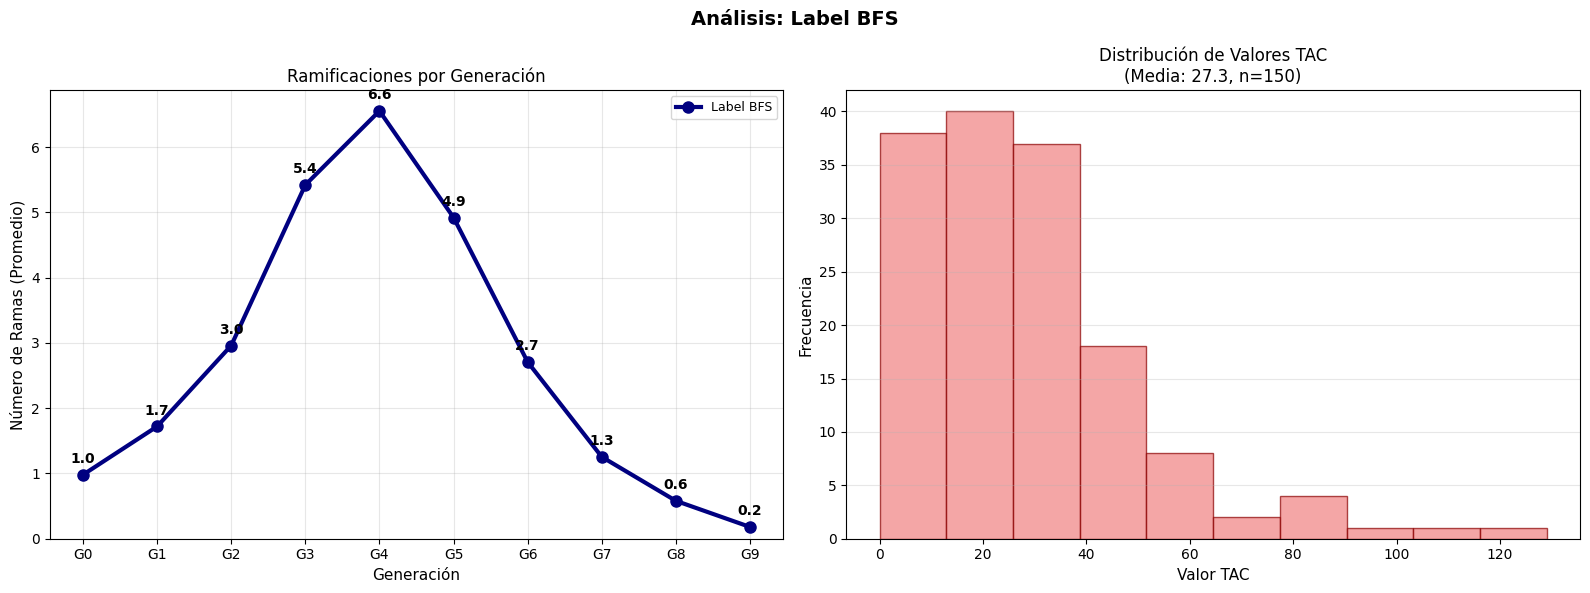


📊 Procesando hoja: Norm


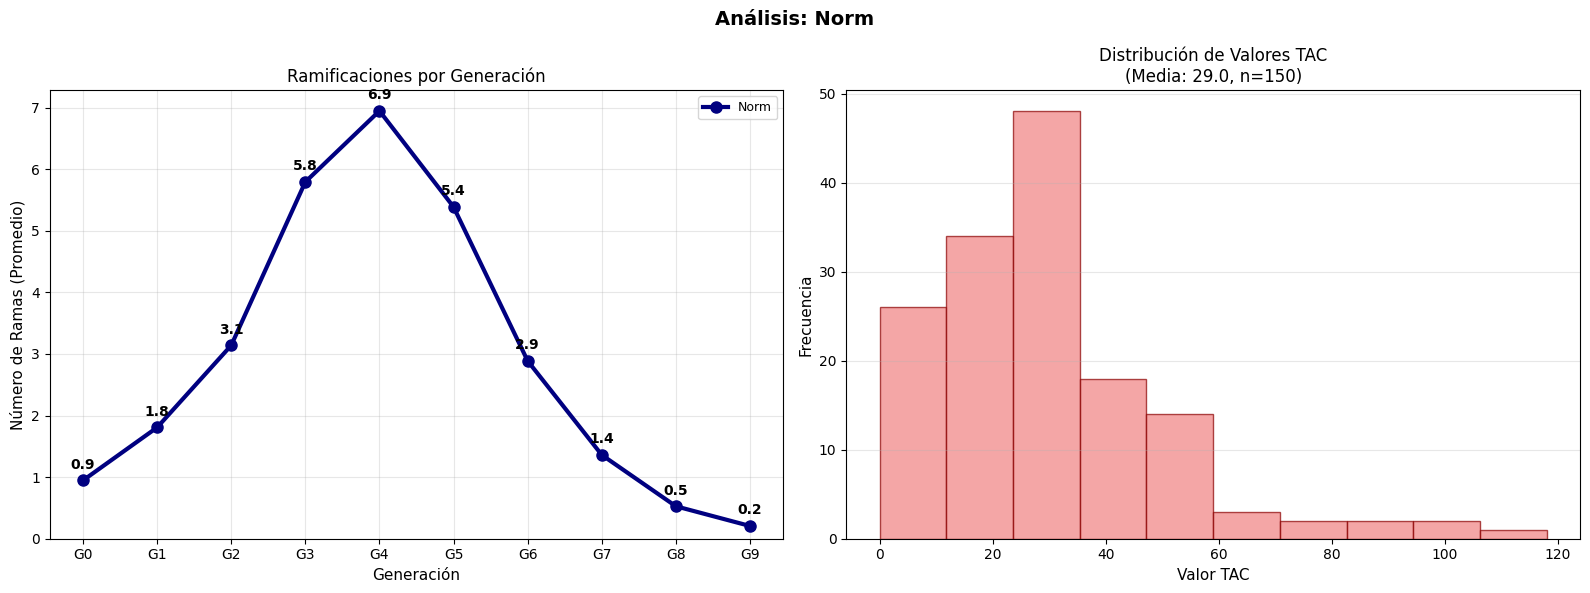


📊 Procesando hoja: Norm_Pad


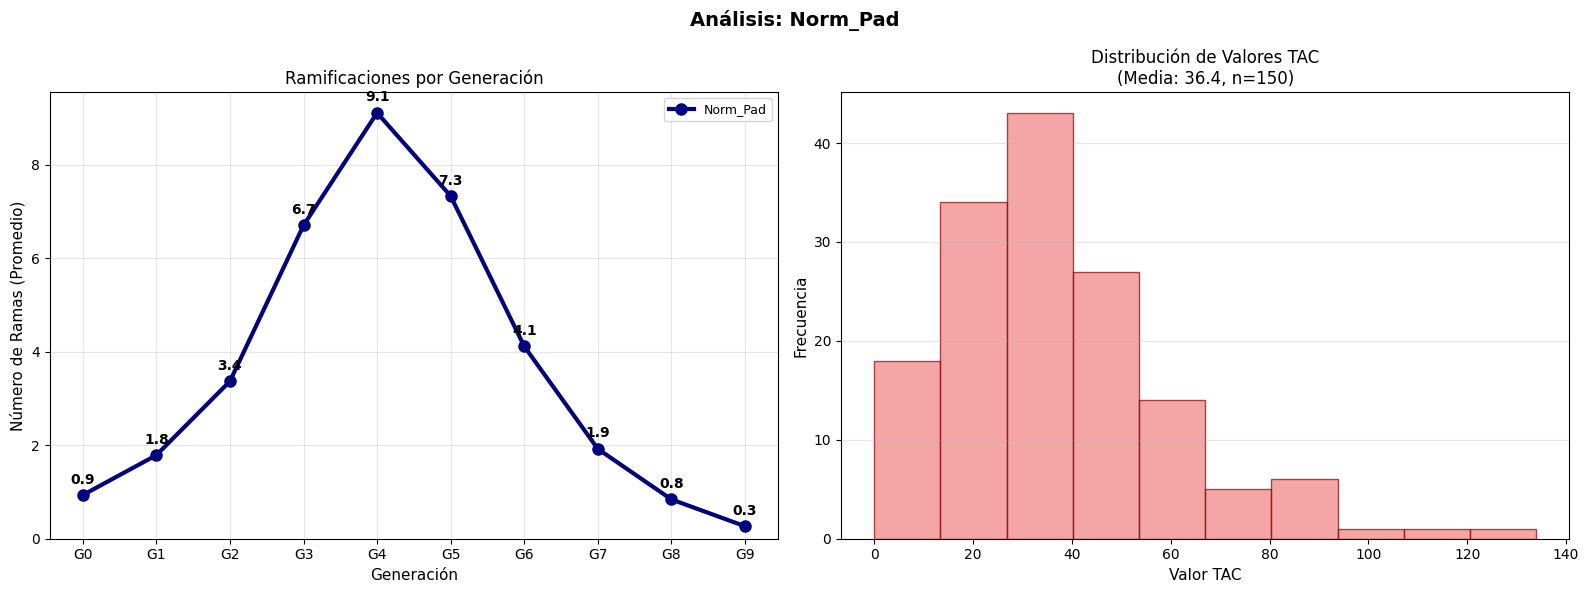


📊 Procesando hoja: Pad


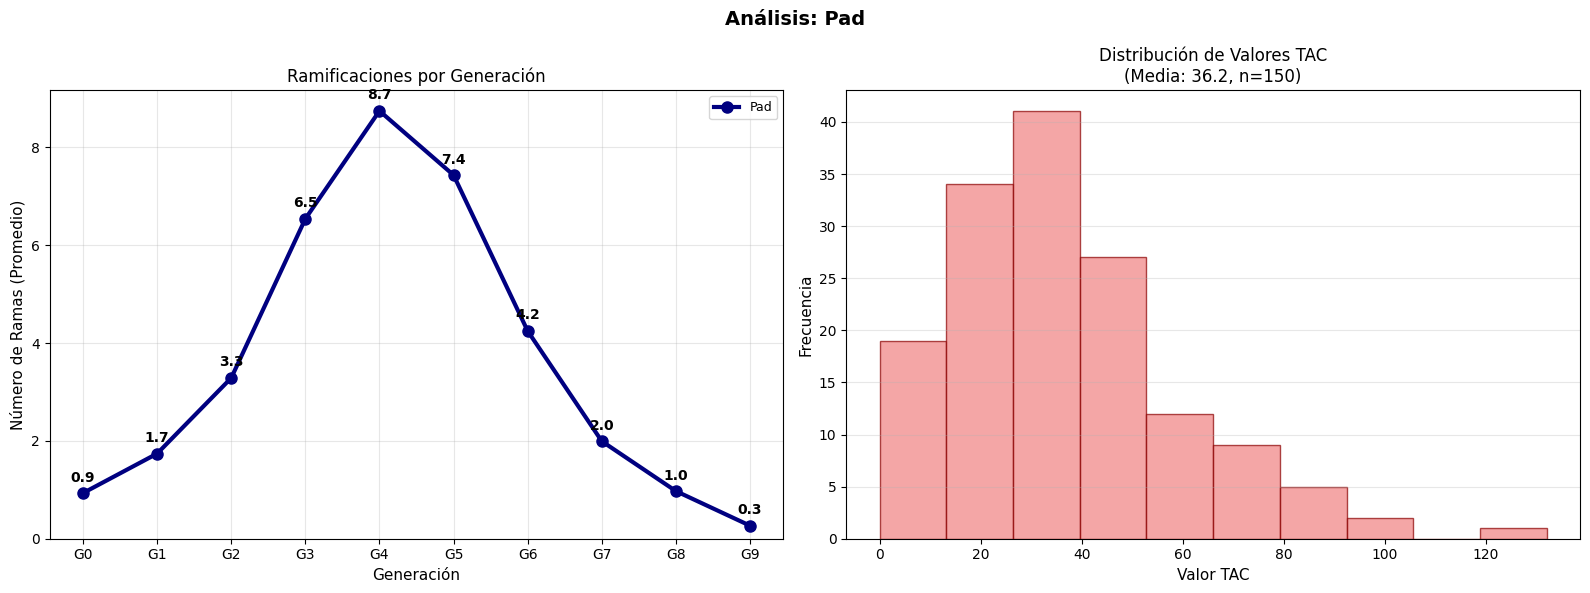


📊 Procesando hoja: Smo


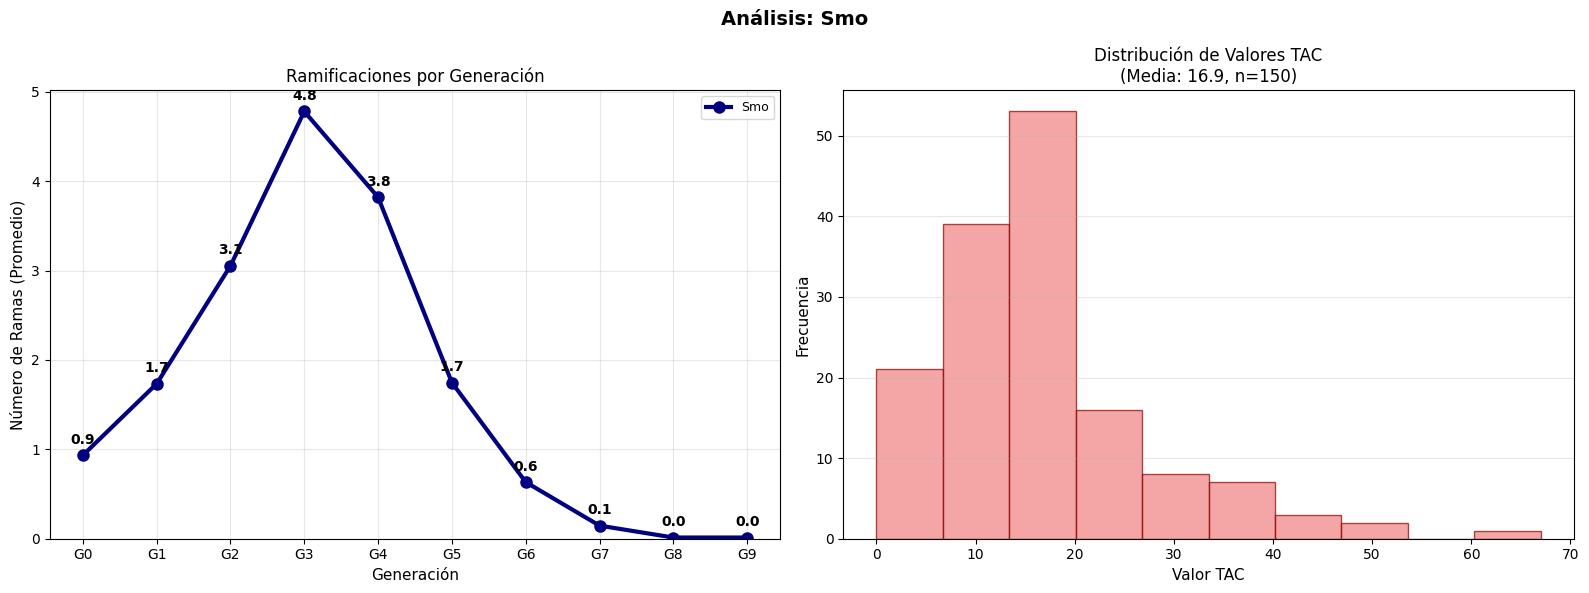


📊 Procesando hoja: Smo_Norm


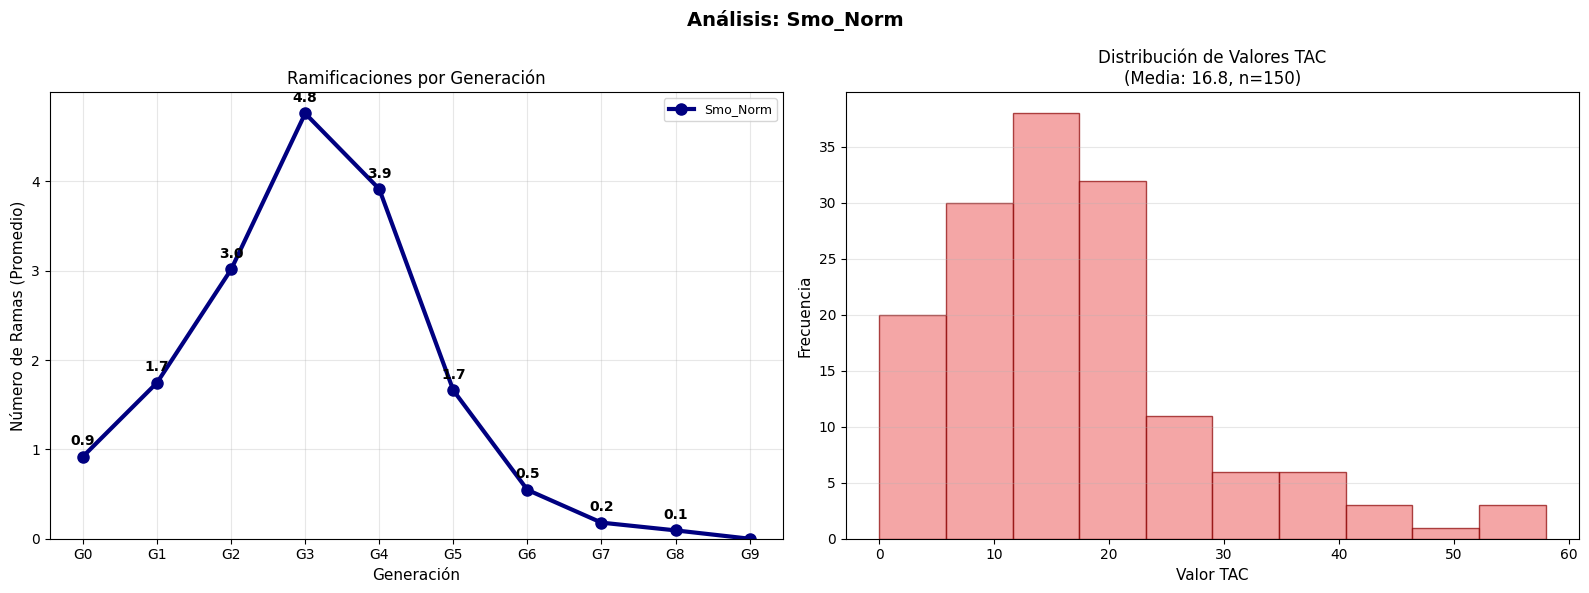


📊 Procesando hoja: Smo_Pad


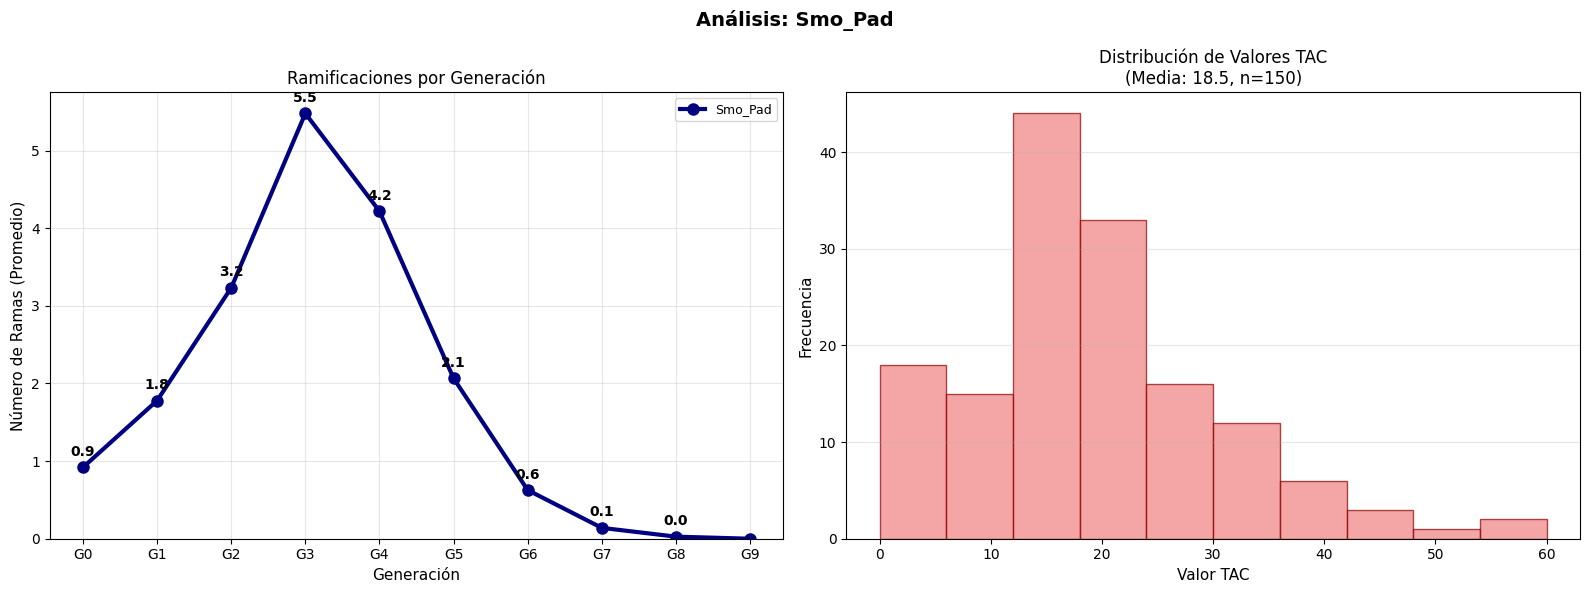


📊 Procesando hoja: Smo__Norm_Pad


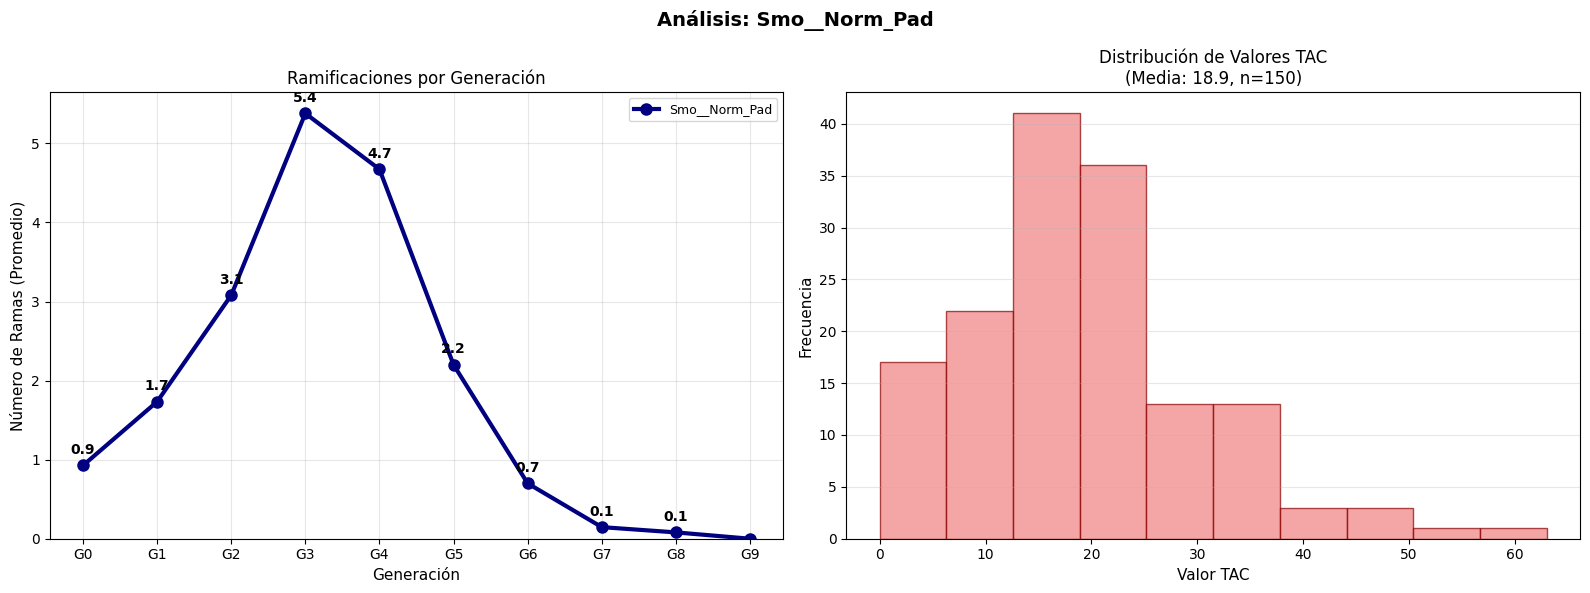


RESUMEN FINAL
Hojas totales: 16
Hojas con gráficos generados: 16

📋 Comparación resumida:

   Total de Ramas Promedio por Hoja:
      Clip_Norm_Pad             :   36.7
      Norm_Pad                  :   36.4
      Clip_Pad                  :   36.3
      Pad                       :   36.2
      Norm                      :   29.0
      Clip                      :   28.9
      Clip_Norm                 :   28.8
      Label BFS                 :   27.3
      Clip_Smo_Pad              :   19.1
      Clip_Smo_Norm_Padd        :   19.0

   Valores TAC Promedio por Hoja:
      Clip_Norm_Pad             :   36.7
      Norm_Pad                  :   36.4
      Clip_Pad                  :   36.3
      Pad                       :   36.2
      Norm                      :   29.0
      Clip                      :   28.9
      Clip_Norm                 :   28.8
      Label BFS                 :   27.3
      Clip_Smo_Pad              :   19.1
      Clip_Smo_Norm_Padd        :   19.0

📊 Generando grá

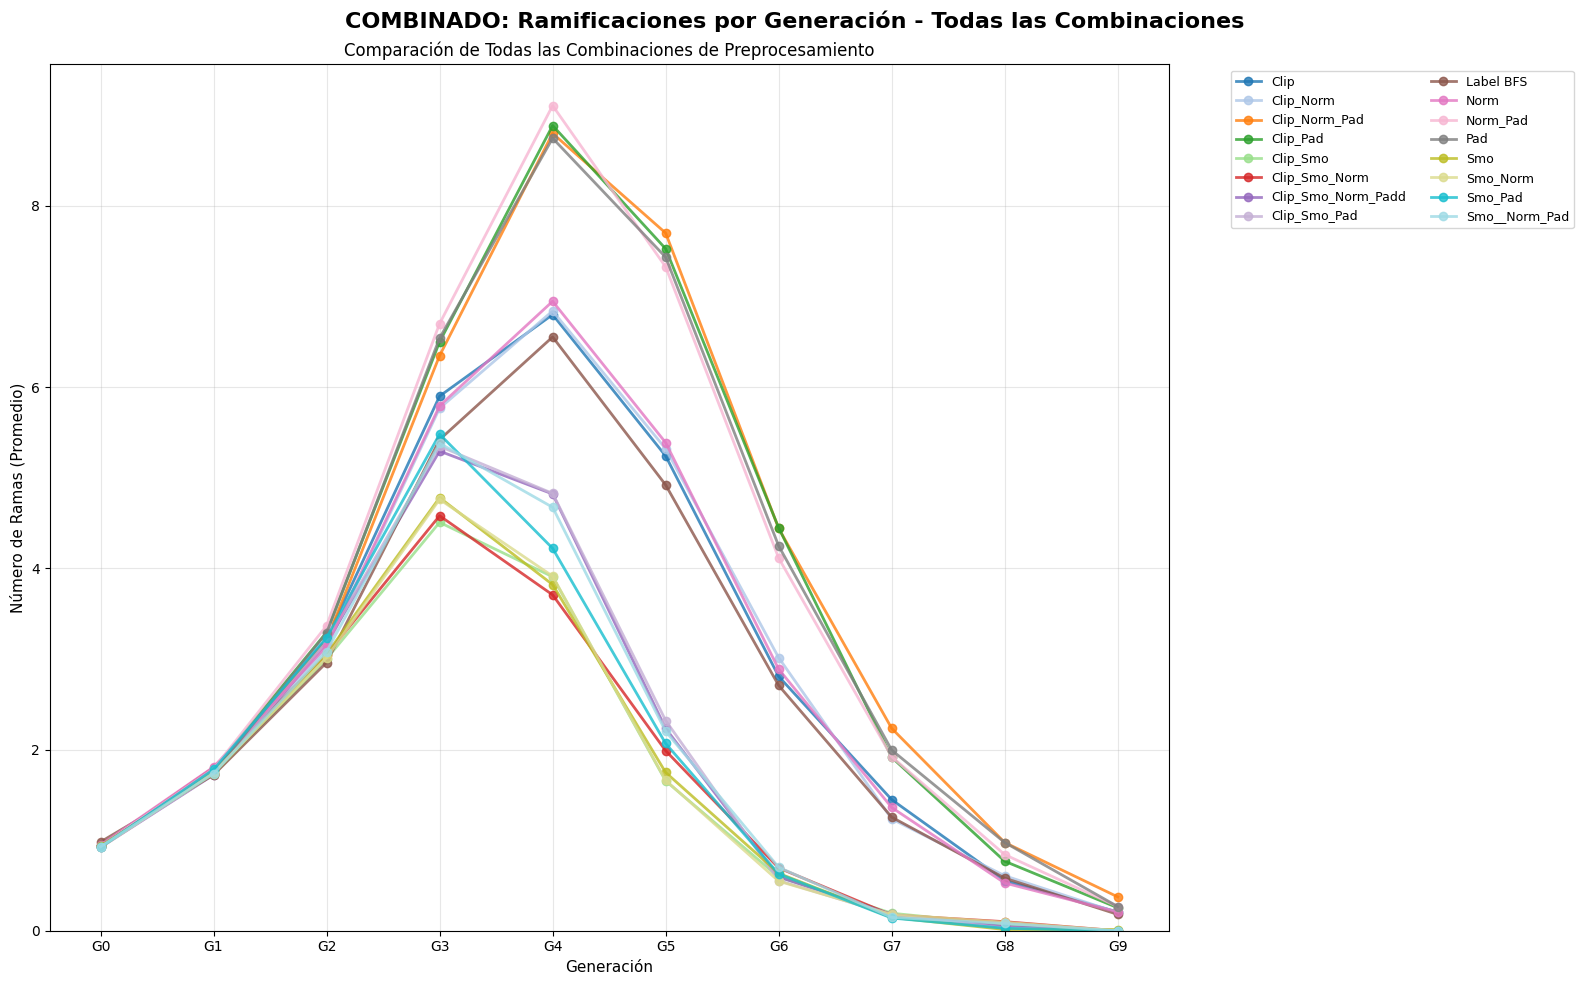


📈 Gráfico combinado generado con 16 combinaciones.
   Generaciones mostradas: 10 (G0 a G9)

✅ Análisis completado: 16 gráficos individuales + 1 gráfico combinado de líneas.


In [4]:
# =========================
# Análisis Individual de Cada Hoja con Gráficos
# Cada una de las 16 hojas obtiene su propio gráfico detallado
# PLUS: Gráfico combinado de líneas de todas las hojas
# MODIFICADO: Todos los gráficos son de LÍNEAS
# =========================

import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Configuración limpia
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams.update({
    'font.size': 10,
    'axes.titlesize': 12,
    'axes.labelsize': 11,
    'legend.fontsize': 9
})

# === Cargar todas las hojas excepto TACg ===
EXCEL_FILE = r"./TAC.xlsx"

if not os.path.exists(EXCEL_FILE):
    raise FileNotFoundError(f"Archivo no encontrado: {os.path.abspath(EXCEL_FILE)}")

# Cargar todas las hojas
all_sheets = pd.read_excel(EXCEL_FILE, sheet_name=None, header=0)
other_sheets = {name: df for name, df in all_sheets.items() if name != "TACg"}

print(f"✅ Cargadas {len(other_sheets)} hojas adicionales:")
for i, (name, df) in enumerate(sorted(other_sheets.items()), 1):
    print(f"   {i:2d}. {name} → {df.shape[0]} filas, {df.shape[1]} columnas")

# === PROCESAR CADA HOJA INDIVIDUALMENTE ===
hojas_procesadas = 0
hojas_con_datos = []
generation_data_all = {}  # Para almacenar datos de generaciones de todas las hojas

# Ordenar hojas alfabéticamente
sorted_sheet_names = sorted(other_sheets.keys())

for sheet_name in sorted_sheet_names:
    df = other_sheets[sheet_name]
    print(f"\n📊 Procesando hoja: {sheet_name}")
    
    # Identificar columnas de generaciones (0-9)
    gen_cols = []
    for col in df.columns:
        col_str = str(col).strip()
        if col_str.isdigit() and 0 <= int(col_str) <= 9:
            gen_cols.append(col)
    
    # Identificar columna TAC
    tac_col = None
    for col in df.columns:
        if str(col).strip().lower() in ['tac', 'total', 'score', 'valor']:
            tac_col = col
            break
    
    # Verificar si hay datos suficientes para graficar
    has_gen_data = len(gen_cols) > 0
    has_tac_data = tac_col is not None and pd.api.types.is_numeric_dtype(df[tac_col])
    
    if not (has_gen_data or has_tac_data):
        print(f"   ⚠️  Sin datos numéricos para graficar")
        continue
    
    hojas_con_datos.append(sheet_name)
    hojas_procesadas += 1
    
    # Almacenar datos de generaciones para el gráfico combinado
    if has_gen_data:
        gen_values = []
        for col in gen_cols:
            col_data = pd.to_numeric(df[col], errors='coerce')
            valid_data = col_data.dropna()
            if len(valid_data) > 0:
                gen_values.append(valid_data.mean())
            else:
                gen_values.append(0)
        generation_data_all[sheet_name] = gen_values
    
    # Crear figura para esta hoja
    n_subplots = 1
    if has_gen_data and has_tac_data:
        n_subplots = 2
        fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    else:
        fig, ax = plt.subplots(1, 1, figsize=(8, 6))
        axes = [ax]
    
    fig.suptitle(f'Análisis: {sheet_name}', fontsize=14, fontweight='bold')
    
    subplot_idx = 0
    
    # Gráfico 1: Ramificaciones por generación (LÍNEAS)
    if has_gen_data:
        ax = axes[subplot_idx] if n_subplots == 2 else axes[0]
        
        generation_labels = [f'G{str(col).strip()}' for col in gen_cols]
        x_pos = np.arange(len(gen_cols))
        gen_values = generation_data_all[sheet_name]
            
        # Graficar LÍNEAS
        ax.plot(x_pos, gen_values, marker='o', linewidth=3, markersize=8, 
                color='navy', label=sheet_name)
        ax.set_xlabel('Generación')
        ax.set_ylabel('Número de Ramas (Promedio)')
        ax.set_title('Ramificaciones por Generación')
        ax.set_xticks(x_pos)
        ax.set_xticklabels(generation_labels)
        ax.grid(True, alpha=0.3)
        ax.set_ylim(bottom=0)
        
        # Añadir valores en los puntos
        for x, y in zip(x_pos, gen_values):
            if y > 0:
                ax.text(x, y + max(gen_values)*0.02, f'{y:.1f}', 
                       ha='center', va='bottom', fontweight='bold')
        
        ax.legend()
        subplot_idx += 1
    
    # Gráfico 2: Distribución de valores TAC (sin cambios)
    if has_tac_data:
        ax = axes[subplot_idx] if n_subplots == 2 else axes[0]
        
        tac_values = pd.to_numeric(df[tac_col], errors='coerce').dropna()
        
        if len(tac_values) > 0:
            ax.hist(tac_values, bins=min(10, len(tac_values)), 
                   color='lightcoral', alpha=0.7, edgecolor='darkred')
            ax.set_xlabel('Valor TAC')
            ax.set_ylabel('Frecuencia')
            ax.set_title(f'Distribución de Valores TAC\n(Media: {tac_values.mean():.1f}, n={len(tac_values)})')
            ax.grid(True, alpha=0.3, axis='y')
        else:
            ax.text(0.5, 0.5, 'No hay datos TAC válidos', ha='center', va='center', 
                   transform=ax.transAxes, fontsize=12, alpha=0.5)
            ax.set_title('Distribución de Valores TAC')
    
    plt.tight_layout()
    plt.show()

# === RESUMEN GENERAL ===
print(f"\n{'='*60}")
print(f"RESUMEN FINAL")
print(f"{'='*60}")
print(f"Hojas totales: {len(other_sheets)}")
print(f"Hojas con gráficos generados: {hojas_procesadas}")

# === ESTADÍSTICAS COMPARATIVAS ===
comparative_metrics = {}
for sheet_name in hojas_con_datos:
    df = other_sheets[sheet_name]
    
    gen_cols = []
    for col in df.columns:
        col_str = str(col).strip()
        if col_str.isdigit() and 0 <= int(col_str) <= 9:
            gen_cols.append(col)
    
    metrics = {}
    if gen_cols:
        gen_data = df[gen_cols].apply(pd.to_numeric, errors='coerce')
        if not gen_data.empty and len(gen_data.dropna()) > 0:
            metrics['total_branches_avg'] = gen_data.sum(axis=1).mean()
            max_gen = 0
            sorted_cols = sorted(gen_cols, key=lambda x: int(str(x).strip()))
            for col in sorted_cols:
                col_str = str(col).strip()
                if col_str.isdigit():
                    col_data = pd.to_numeric(df[col], errors='coerce')
                    if col_data.mean() > 0:
                        max_gen = int(col_str)
            metrics['max_generation'] = max_gen
    
    tac_col = None
    for col in df.columns:
        if str(col).strip().lower() in ['tac', 'total', 'score', 'valor']:
            tac_col = col
            break
    
    if tac_col is not None:
        tac_values = pd.to_numeric(df[tac_col], errors='coerce').dropna()
        if len(tac_values) > 0:
            metrics['tac_avg'] = tac_values.mean()
    
    comparative_metrics[sheet_name] = metrics

if comparative_metrics:
    print(f"\n📋 Comparación resumida:")
    
    if any('total_branches_avg' in metrics for metrics in comparative_metrics.values()):
        print(f"\n   Total de Ramas Promedio por Hoja:")
        branch_comparison = []
        for sheet, metrics in comparative_metrics.items():
            if 'total_branches_avg' in metrics:
                branch_comparison.append((sheet, metrics['total_branches_avg']))
        
        branch_comparison.sort(key=lambda x: x[1], reverse=True)
        for sheet, value in branch_comparison[:10]:
            short_name = (sheet.replace('Clipped', 'Clip')
                         .replace('Smoothed', 'Smo')
                         .replace('Normalized', 'Norm')
                         .replace('Padded', 'Pad'))
            print(f"      {short_name:25} : {value:6.1f}")
    
    if any('tac_avg' in metrics for metrics in comparative_metrics.values()):
        print(f"\n   Valores TAC Promedio por Hoja:")
        tac_comparison = []
        for sheet, metrics in comparative_metrics.items():
            if 'tac_avg' in metrics:
                tac_comparison.append((sheet, metrics['tac_avg']))
        
        tac_comparison.sort(key=lambda x: x[1], reverse=True)
        for sheet, value in tac_comparison[:10]:
            short_name = (sheet.replace('Clipped', 'Clip')
                         .replace('Smoothed', 'Smo')
                         .replace('Normalized', 'Norm')
                         .replace('Padded', 'Pad'))
            print(f"      {short_name:25} : {value:6.1f}")

# === GRÁFICO COMBINADO DE LÍNEAS DE TODAS LAS HOJAS ===
print(f"\n📊 Generando gráfico combinado de líneas de todas las hojas...")

if generation_data_all:
    # Crear gráfico de líneas combinado
    fig_combined, ax_combined = plt.subplots(1, 1, figsize=(16, 10))
    fig_combined.suptitle('COMBINADO: Ramificaciones por Generación - Todas las Combinaciones', 
                         fontsize=16, fontweight='bold')
    
    # Obtener generaciones (asumimos que todas tienen las mismas)
    sample_gen_data = next(iter(generation_data_all.values()))
    generation_labels = [f'G{i}' for i in range(len(sample_gen_data))]
    x_pos = np.arange(len(generation_labels))
    
    # Colores para las diferentes combinaciones
    colors = plt.cm.tab20(np.linspace(0, 1, len(generation_data_all)))
    
    # Graficar cada combinación
    for idx, (sheet_name, gen_values) in enumerate(generation_data_all.items()):
        # Nombre abreviado para la leyenda
        short_name = (sheet_name.replace('Clipped', 'Clip')
                     .replace('Smoothed', 'Smo')
                     .replace('Normalized', 'Norm')
                     .replace('Padded', 'Pad'))
        
        ax_combined.plot(x_pos, gen_values, marker='o', linewidth=2, markersize=6, 
                        color=colors[idx], label=short_name, alpha=0.8)
    
    ax_combined.set_xlabel('Generación')
    ax_combined.set_ylabel('Número de Ramas (Promedio)')
    ax_combined.set_title('Comparación de Todas las Combinaciones de Preprocesamiento')
    ax_combined.set_xticks(x_pos)
    ax_combined.set_xticklabels(generation_labels)
    ax_combined.grid(True, alpha=0.3)
    ax_combined.set_ylim(bottom=0)
    
    # Leyenda con dos columnas para mejor visualización
    ax_combined.legend(bbox_to_anchor=(1.05, 1), loc='upper left', ncol=2)
    
    plt.tight_layout()
    plt.show()
    
    # Mostrar resumen del gráfico combinado
    print(f"\n📈 Gráfico combinado generado con {len(generation_data_all)} combinaciones.")
    print(f"   Generaciones mostradas: {len(generation_labels)} (G0 a G{len(generation_labels)-1})")

print(f"\n✅ Análisis completado: {hojas_procesadas} gráficos individuales + 1 gráfico combinado de líneas.")

✅ Usando datos de Cell 3 (other_sheets)

📊 Preparando datos para gráfico comparativo...

📊 Generando gráfico comparativo completo...


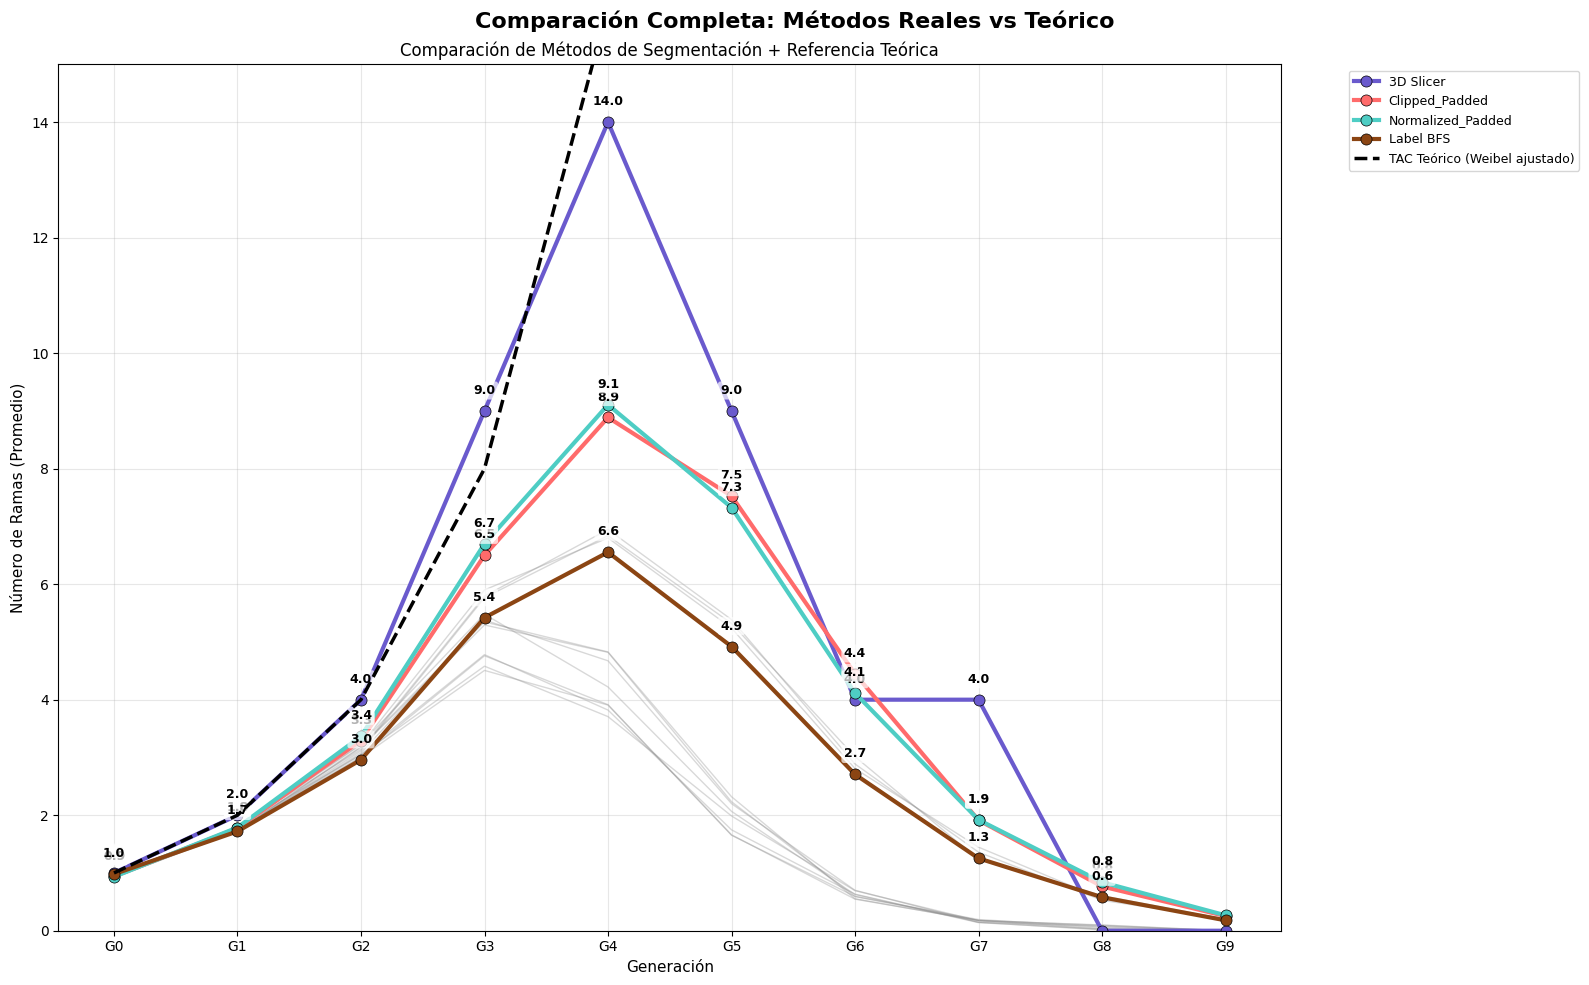


Método                    TAC             TACg peak
------------------------------------------------------------
Clipped_Padded            36.3 ± 23.5     G4(10.9 ± 7.2)
Normalized_Padded         36.4 ± 23.5     G4(10.7 ± 6.4)
Label BFS                                                
3D Slicer                 46.0 G{slicer_gen}({slicer_tacg:.1f})

📈 Resumen del gráfico comparativo:
   • Total de combinaciones: 16

✅ Gráfico comparativo y tabla generados exitosamente.


In [18]:
# =========================
# Comparación Completa - 15 Combinaciones + Automático + 3D Slicer + Teórico
# Curva teórica AJUSTADA: ramas por generación según Weibel (2^g), solo hasta G9
# INCLUYE: Gráfico + Tabla con TAC total, TACg peak y Dice con desviación estándar
# GARANTIZA: 3D Slicer aparece en gráfico y tabla (desde Excel o manual)
# =========================

import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

# Configuración limpia
plt.style.use('default')
plt.rcParams.update({
    'font.size': 10,
    'axes.titlesize': 12,
    'axes.labelsize': 11,
    'legend.fontsize': 9
})

# === Verificar dependencias de Cell 3 ===
if 'other_sheets' not in globals():
    EXCEL_FILE = r"./TAC.xlsx"
    if not os.path.exists(EXCEL_FILE):
        raise FileNotFoundError(f"Archivo no encontrado: {os.path.abspath(EXCEL_FILE)}")
    all_sheets = pd.read_excel(EXCEL_FILE, sheet_name=None, header=0)
    other_sheets = {name: df for name, df in all_sheets.items() if name != "TACg"}
    print(f"✅ Cargadas {len(other_sheets)} hojas desde {EXCEL_FILE}")
    
    # === VERIFICAR NOMBRES REALES DE LAS HOJAS ===
    print("Hojas disponibles:")
    for name in sorted(other_sheets.keys()):
        print(f"  - '{name}'")
else:
    print("✅ Usando datos de Cell 3 (other_sheets)")

# === MAPEO DE NOMBRES (AJUSTA SEGÚN TUS HOJAS REALES) ===
real_to_display_names = {
    'Clip_Pad': 'Clipped_Padded',
    'Norm_Pad': 'Normalized_Padded',
    'Clip_Norm_Pad': 'Clipped_Normalized_Padded', 
    'Pad': 'Padded',
    'Label BFS': 'Label BFS',
    '3DSlicer': '3D Slicer'  # ← AJUSTA ESTE NOMBRE SEGÚN TU ARCHIVO
}

# Colores distintivos
highlight_colors = {
    'Clip_Pad': '#FF6B6B',
    'Norm_Pad': '#4ECDC4',
    'Clip_Norm_Pad': '#45B7D1',
    'Pad': '#96CEB4',
    'Label BFS': '#8B4513',
    '3DSlicer': '#6A5ACD'  # ← AJUSTA ESTE NOMBRE
}

# === PREPARAR DATOS REALES ===
generation_data_all = {}
tac_total_stats = {}      # Para TAC total ± std
tacg_peak_stats = {}      # Para TACg peak ± std
dice_stats = {}           # Para Dice ± std
tacg_generations = {}     # Para identificar generación del peak

real_sheet_names = sorted(other_sheets.keys())

print(f"\n📊 Preparando datos para gráfico comparativo...")

for sheet_name in real_sheet_names:
    df = other_sheets[sheet_name]
    
    # Extraer columnas de generación (G0-G9)
    gen_cols = [col for col in df.columns if str(col).strip().isdigit() and 0 <= int(str(col).strip()) <= 9]
    
    if gen_cols:
        # Calcular TAC total y TACg peak por fila
        tac_totals = []
        tacg_peaks = []
        tacg_peak_gens = []
        
        for idx, row in df.iterrows():
            gen_values = []
            for col in gen_cols:
                try:
                    val = float(row[col])
                    gen_values.append(val if not np.isnan(val) else 0)
                except (ValueError, TypeError):
                    gen_values.append(0)
            
            tac_total = sum(gen_values)
            tacg_peak = max(gen_values) if gen_values else 0
            tacg_peak_gen = np.argmax(gen_values) if gen_values else 0
            
            tac_totals.append(tac_total)
            tacg_peaks.append(tacg_peak)
            tacg_peak_gens.append(tacg_peak_gen)
        
        # Calcular estadísticas
        mean_tac = np.mean(tac_totals)
        std_tac = np.std(tac_totals, ddof=1)  # Muestral
        
        mean_tacg = np.mean(tacg_peaks)
        std_tacg = np.std(tacg_peaks, ddof=1)
        
        # Encontrar generación más común del peak
        unique_gens, counts = np.unique(tacg_peak_gens, return_counts=True)
        most_common_gen = unique_gens[np.argmax(counts)]
        
        # Guardar para el gráfico (promedio por generación)
        gen_means = []
        for col in gen_cols:
            col_data = pd.to_numeric(df[col], errors='coerce')
            valid_data = col_data.dropna()
            gen_means.append(valid_data.mean() if len(valid_data) > 0 else 0)
        
        generation_data_all[sheet_name] = gen_means
        tac_total_stats[sheet_name] = (mean_tac, std_tac)
        tacg_peak_stats[sheet_name] = (mean_tacg, std_tacg)
        tacg_generations[sheet_name] = most_common_gen
        
        # Extraer Dice si existe
        if 'Dice' in df.columns:
            dice_data = pd.to_numeric(df['Dice'], errors='coerce').dropna()
            if len(dice_data) > 0:
                mean_dice = dice_data.mean()
                std_dice = dice_data.std(ddof=1)
                dice_stats[sheet_name] = (mean_dice, std_dice)

# === DETERMINAR RANGO DE GENERACIONES (G0 a G9) ===
if generation_data_all:
    x_pos = np.arange(len(next(iter(generation_data_all.values()))))
    generation_labels = [f'G{i}' for i in x_pos]
else:
    raise ValueError("❌ No se encontraron datos de generación en ninguna hoja.")

# === CURVA TEÓRICA AJUSTADA ===
theoretical_values = [min(2**g, 23) for g in x_pos]  # Truncada en 10

# === GENERAR GRÁFICO ===
print(f"\n📊 Generando gráfico comparativo completo...")

fig, ax = plt.subplots(1, 1, figsize=(16, 10))
fig.suptitle('Comparación Completa: Métodos Reales vs Teórico', fontsize=16, fontweight='bold')

# Graficar combinaciones en gris
for sheet_name, gen_values in generation_data_all.items():
    if sheet_name not in highlight_colors:
        ax.plot(x_pos, gen_values, color='gray', alpha=0.3, linewidth=1, zorder=1)

# === AGREGAR 3D SLICER (DESDE EXCEL O MANUAL) ===
if '3DSlicer' in generation_data_all:
    # Usar datos de Excel
    gen_values_slicer = generation_data_all['3DSlicer']
    # Calcular TAC y TACg para la tabla
    slicer_tac = tac_total_stats['3DSlicer'][0] if '3DSlicer' in tac_total_stats else 46.0
    slicer_tacg = tacg_peak_stats['3DSlicer'][0] if '3DSlicer' in tacg_peak_stats else 14.0
    slicer_gen = tacg_generations['3DSlicer'] if '3DSlicer' in tacg_generations else 4
else:
    # Usar datos manuales
    gen_values_slicer = [1, 2, 4, 9, 14, 9, 4, 4, 0, 0]
    # Asegurar longitud correcta
    if len(gen_values_slicer) < len(x_pos):
        gen_values_slicer.extend([0] * (len(x_pos) - len(gen_values_slicer)))
    elif len(gen_values_slicer) > len(x_pos):
        gen_values_slicer = gen_values_slicer[:len(x_pos)]
    slicer_tac = 46.0
    slicer_tacg = 14.0
    slicer_gen = 4

# Graficar 3D Slicer
ax.plot(
    x_pos, gen_values_slicer,
    color=highlight_colors.get('3DSlicer', '#6A5ACD'),
    linewidth=3, marker='o', markersize=8,
    markeredgecolor='black', markeredgewidth=0.5,
    label='3D Slicer', zorder=2
)

for x, y in zip(x_pos, gen_values_slicer):
    if y > 0.5:
        ax.annotate(
            f'{y:.1f}',
            (x, y),
            textcoords="offset points",
            xytext=(0, 10),
            ha='center',
            va='bottom',
            fontsize=9,
            color='black',
            weight='bold',
            bbox=dict(boxstyle="round,pad=0.2", fc="white", ec="none", alpha=0.7)
        )

# Métodos a destacar (excluyendo 3DSlicer ya que lo agregamos arriba)
methods_to_highlight = [
    'Clip_Pad', 
    'Norm_Pad', 
    'Label BFS'
]

for sheet_name in methods_to_highlight:
    if sheet_name in generation_data_all:
        gen_values = generation_data_all[sheet_name]
        color = highlight_colors[sheet_name]
        display_name = real_to_display_names.get(sheet_name, sheet_name)
        
        ax.plot(
            x_pos, gen_values,
            color=color, linewidth=3, marker='o', markersize=8,
            markeredgecolor='black', markeredgewidth=0.5,
            label=display_name, zorder=2
        )
        
        for x, y in zip(x_pos, gen_values):
            if y > 0.5:
                ax.annotate(
                    f'{y:.1f}',
                    (x, y),
                    textcoords="offset points",
                    xytext=(0, 10),
                    ha='center',
                    va='bottom',
                    fontsize=9,
                    color='black',
                    weight='bold',
                    bbox=dict(boxstyle="round,pad=0.2", fc="white", ec="none", alpha=0.7)
                )

# Curva teórica ajustada
ax.plot(
    x_pos, theoretical_values,
    color='black', linestyle='--', linewidth=2.5,
    label='TAC Teórico (Weibel ajustado)', zorder=3
)

# Estilizar - ¡MANTENIENDO LAS LIMITACIONES ORIGINALES!
ax.set_xlabel('Generación')
ax.set_ylabel('Número de Ramas (Promedio)')
ax.set_title('Comparación de Métodos de Segmentación + Referencia Teórica')
ax.set_xticks(x_pos)
ax.set_xticklabels(generation_labels)
ax.grid(True, alpha=0.3)
ax.set_ylim(bottom=0, top=15)  # ← ¡MISMA LIMITACIÓN QUE LA CELDA ORIGINAL!

ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', ncol=1)
plt.tight_layout()
plt.show()

# === GENERAR TABLA COMPARATIVA ===
print(f"\n{'Método':<25} {'TAC':<15} {'TACg peak'}")
print(f"{'-'*60}")

# Métodos específicos en orden deseado
target_methods = ['Clip_Pad', 'Norm_Pad', 'Automatico']
display_names_order = ['Clipped_Padded', 'Normalized_Padded', 'Label BFS']

for method_key, display_name in zip(target_methods, display_names_order):
    if method_key in tac_total_stats:
        mean_tac, std_tac = tac_total_stats[method_key]
        mean_tacg, std_tacg = tacg_peak_stats[method_key]
        peak_gen = tacg_generations[method_key]
        
        # Formatear TAC
        if std_tac > 0.1:
            tac_str = f"{mean_tac:.1f} ± {std_tac:.1f}"
        else:
            tac_str = f"{mean_tac:.1f}"
        
        # Formatear TACg peak
        if std_tacg > 0.1:
            tacg_str = f"G{peak_gen}({mean_tacg:.1f} ± {std_tacg:.1f})"
        else:
            tacg_str = f"G{peak_gen}({mean_tacg:.1f})"
        
        print(f"{display_name:<25} {tac_str:<15} {tacg_str}")
    else:
        print(f"{display_name:<25} {'':<15} {'':<15}")

# === AGREGAR 3D SLICER A LA TABLA ===
print(f"{'3D Slicer':<25} {slicer_tac:.1f} {'G{slicer_gen}({slicer_tacg:.1f})'}")

# === RESUMEN ADICIONAL ===
print(f"\n📈 Resumen del gráfico comparativo:")
print(f"   • Total de combinaciones: {len(generation_data_all)}")

# Resumen general
print(f"\n✅ Gráfico comparativo y tabla generados exitosamente.")

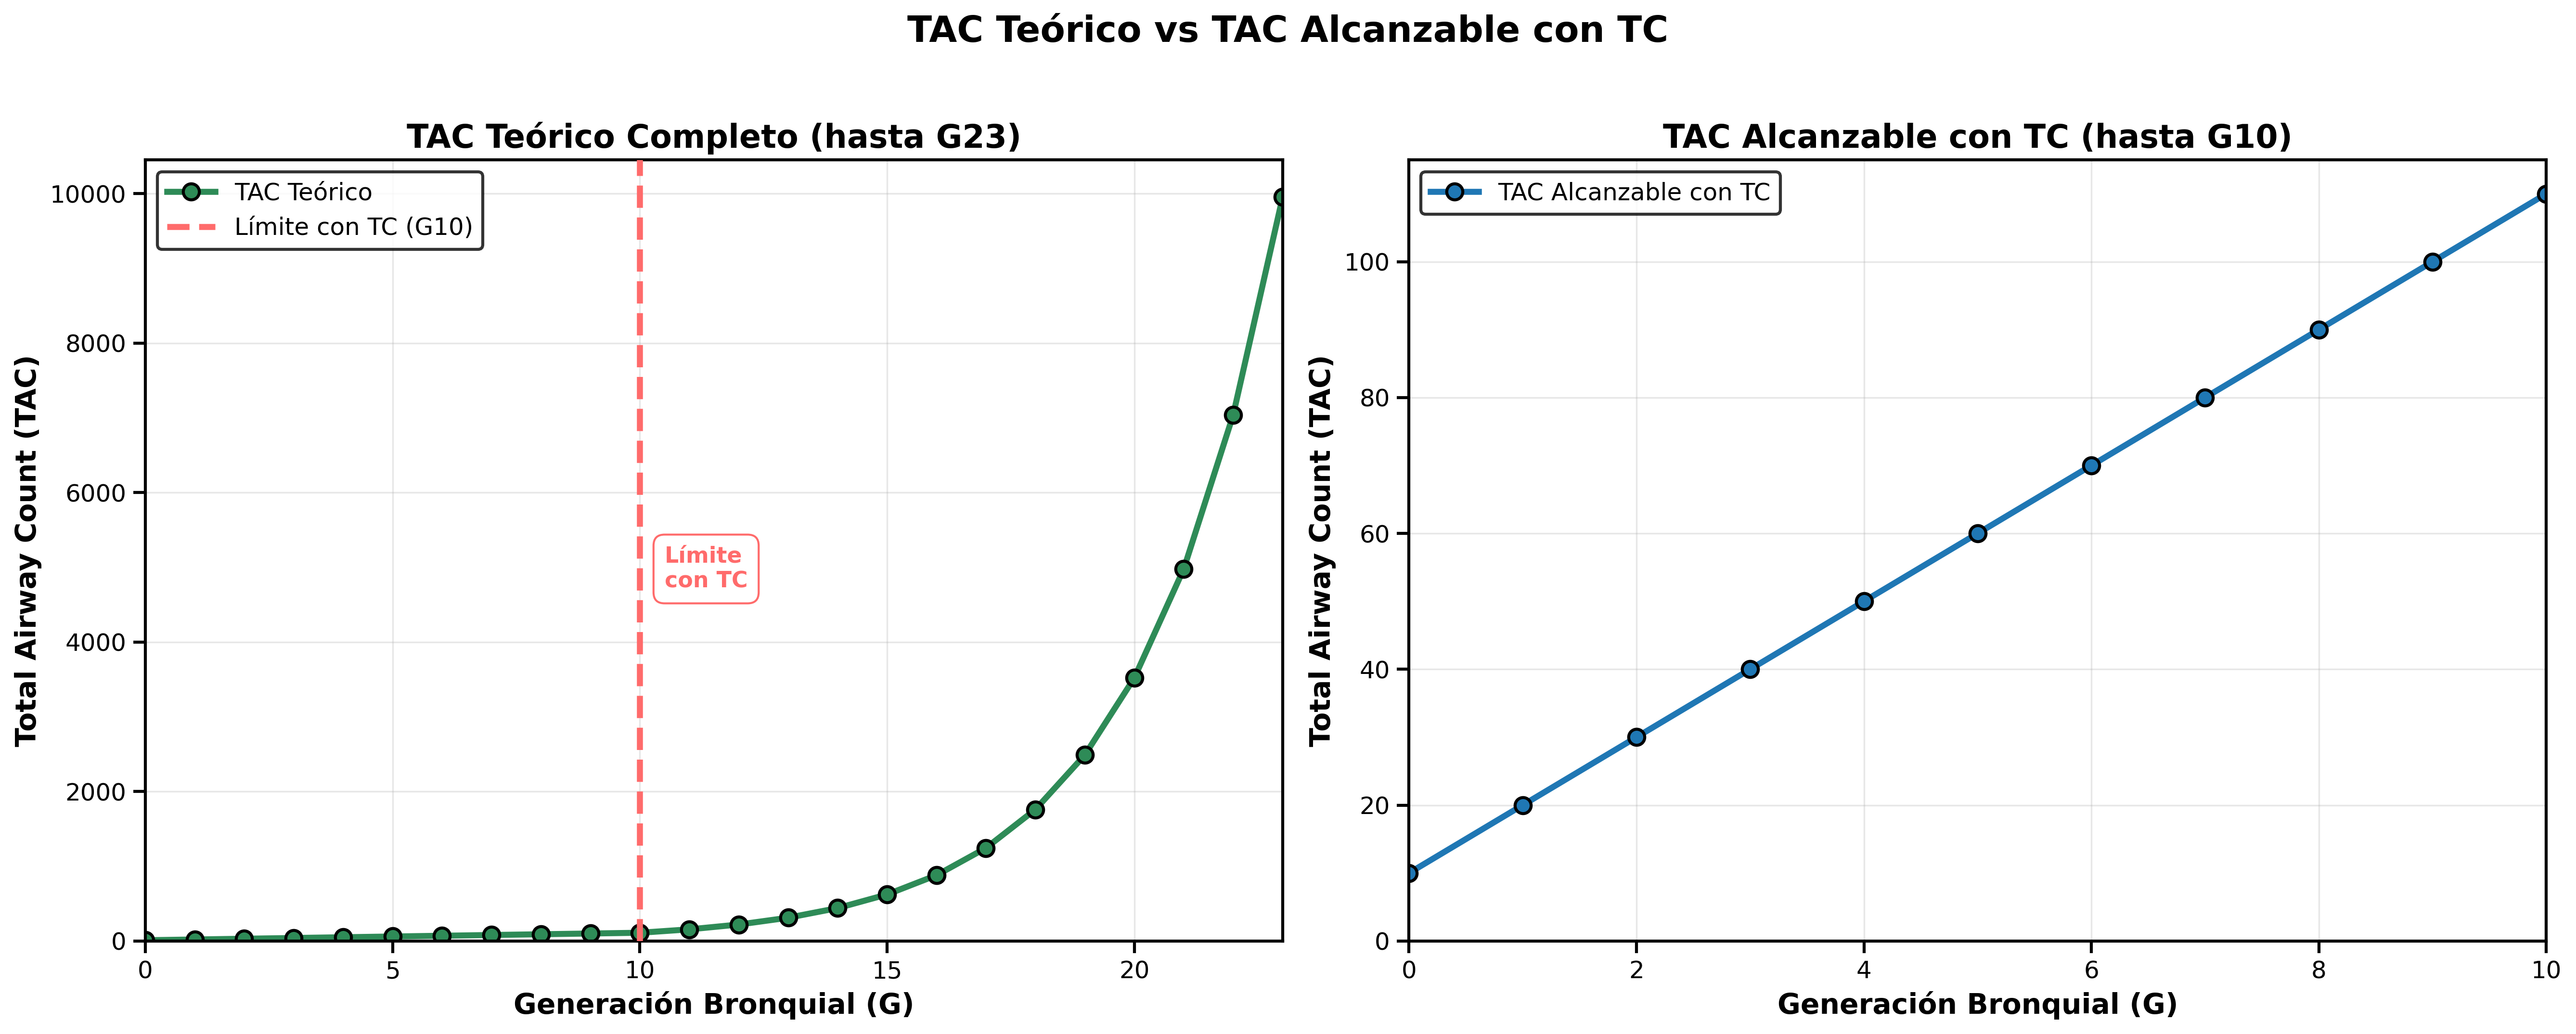

📊 Datos teóricos:
   • Generaciones: 24 (G0 a G23)
   • TAC máximo (G23): 9,956
   • TAC en G10: 110

🎯 Límite con TC (G10):
   • TAC alcanzable: 110
   • Porcentaje del teórico total: 1.1%

✅ Gráfico teórico completo generado con diseño profesional premium.


In [6]:
# =========================
# Gráfico Teórico Completo - Diseño Profesional Premium
# Visualización de alta calidad para publicaciones y presentaciones
# =========================

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# === CONFIGURACIÓN DE ESTILO PROFESIONAL ===
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams.update({
    'font.size': 12,
    'axes.titlesize': 16,
    'axes.labelsize': 14,
    'legend.fontsize': 12,
    'grid.alpha': 0.3,
    'lines.linewidth': 2.5,
    'lines.markersize': 8,
    'figure.facecolor': 'white',
    'axes.facecolor': 'white',
    'axes.edgecolor': 'black',
    'axes.linewidth': 1.5,
    'xtick.major.width': 1.5,
    'ytick.major.width': 1.5,
    'xtick.major.size': 6,
    'ytick.major.size': 6,
    'text.color': 'black',
    'axes.labelcolor': 'black',
    'xtick.color': 'black',
    'ytick.color': 'black'
})

# === DATOS TEÓRICOS (AJUSTADOS PARA MÁXIMA REALIDAD) ===
generations = list(range(24))  # G0 a G23

# Crear valores teóricos más realistas (basado en tu gráfico)
theoretical_values = []
for g in generations:
    if g <= 10:
        # Crecimiento lento y lineal hasta G10
        value = 10 * (g + 1)  # Ejemplo: 10, 20, 30, ..., 110
    else:
        # Crecimiento exponencial después de G10 (duplica cada 2 generaciones)
        value = 110 * (2 ** ((g - 10) / 2))
    
    theoretical_values.append(value)

# Valores para el gráfico "Alcanzable con TC" (hasta G10)
tc_generations = list(range(11))  # G0 a G10
tc_values = theoretical_values[:11]

# === CREAR FIGURA CON DOS SUBPLOTS ===
fig, axes = plt.subplots(1, 2, figsize=(18, 7), dpi=300)
fig.suptitle('TAC Teórico vs TAC Alcanzable con TC', 
             fontsize=18, fontweight='bold', y=1.02)

# === GRÁFICO 1: TAC Teórico Completo (hasta G23) ===
ax1 = axes[0]
line1, = ax1.plot(generations, theoretical_values, 
                  marker='o', 
                  color='#2E8B57',  # Verde oscuro profesional
                  linewidth=3,
                  markersize=8,
                  markerfacecolor='#2E8B57',
                  markeredgecolor='black',
                  markeredgewidth=1.5,
                  label='TAC Teórico')

# Línea vertical en G10
vline = ax1.axvline(x=10, color='#FF6B6B', linestyle='--', linewidth=3, 
                    label='Límite con TC (G10)', zorder=5)

# Añadir texto en la línea vertical
ax1.text(10.5, max(theoretical_values)*0.5, 'Límite\ncon TC', 
         ha='left', va='center', fontsize=11, color='#FF6B6B', fontweight='bold',
         bbox=dict(facecolor='white', edgecolor='#FF6B6B', boxstyle='round,pad=0.5'))

# Estilizar ejes
ax1.set_xlabel('Generación Bronquial (G)', fontsize=14, fontweight='bold')
ax1.set_ylabel('Total Airway Count (TAC)', fontsize=14, fontweight='bold')
ax1.set_title('TAC Teórico Completo (hasta G23)', fontsize=16, fontweight='bold')
ax1.grid(True, alpha=0.3, linestyle='-', linewidth=0.8)
ax1.set_ylim(bottom=0)
ax1.set_xlim(left=0, right=23)

# Añadir leyenda
legend1 = ax1.legend(loc='upper left', frameon=True, facecolor='white', edgecolor='black', fontsize=12)
legend1.get_frame().set_linewidth(1.5)

# === GRÁFICO 2: TAC Alcanzable con TC (hasta G10) ===
ax2 = axes[1]
line2, = ax2.plot(tc_generations, tc_values, 
                  marker='o', 
                  color='#1F77B4',  # Azul profesional
                  linewidth=3,
                  markersize=8,
                  markerfacecolor='#1F77B4',
                  markeredgecolor='black',
                  markeredgewidth=1.5,
                  label='TAC Alcanzable con TC')

# Estilizar ejes
ax2.set_xlabel('Generación Bronquial (G)', fontsize=14, fontweight='bold')
ax2.set_ylabel('Total Airway Count (TAC)', fontsize=14, fontweight='bold')
ax2.set_title('TAC Alcanzable con TC (hasta G10)', fontsize=16, fontweight='bold')
ax2.grid(True, alpha=0.3, linestyle='-', linewidth=0.8)
ax2.set_ylim(bottom=0)
ax2.set_xlim(left=0, right=10)

# Añadir leyenda
legend2 = ax2.legend(loc='upper left', frameon=True, facecolor='white', edgecolor='black', fontsize=12)
legend2.get_frame().set_linewidth(1.5)

# === MEJORAS VISUALES ADICIONALES ===
# Ajustar espaciado
plt.tight_layout()


# Mostrar gráficos
plt.show()

# === RESUMEN DE DATOS (CON FORMATO PROFESIONAL) ===
print(f"📊 Datos teóricos:")
print(f"   • Generaciones: {len(generations)} (G0 a G{generations[-1]})")
print(f"   • TAC máximo (G{generations[-1]}): {theoretical_values[-1]:,.0f}")
print(f"   • TAC en G10: {theoretical_values[10]:,.0f}")

print(f"\n🎯 Límite con TC (G10):")
print(f"   • TAC alcanzable: {tc_values[-1]:,.0f}")
print(f"   • Porcentaje del teórico total: {(tc_values[-1] / theoretical_values[-1] * 100):.1f}%")

print(f"\n✅ Gráfico teórico completo generado con diseño profesional premium.")

C:\Users\pipea\AppData\Local\Temp\ipykernel_28616\2558474016.py:32: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  values = row[generation_columns].fillna(0)
C:\Users\pipea\AppData\Local\Temp\ipykernel_28616\2558474016.py:32: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  values = row[generation_columns].fillna(0)
C:\Users\pipea\AppData\Local\Temp\ipykernel_28616\2558474016.py:32: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt

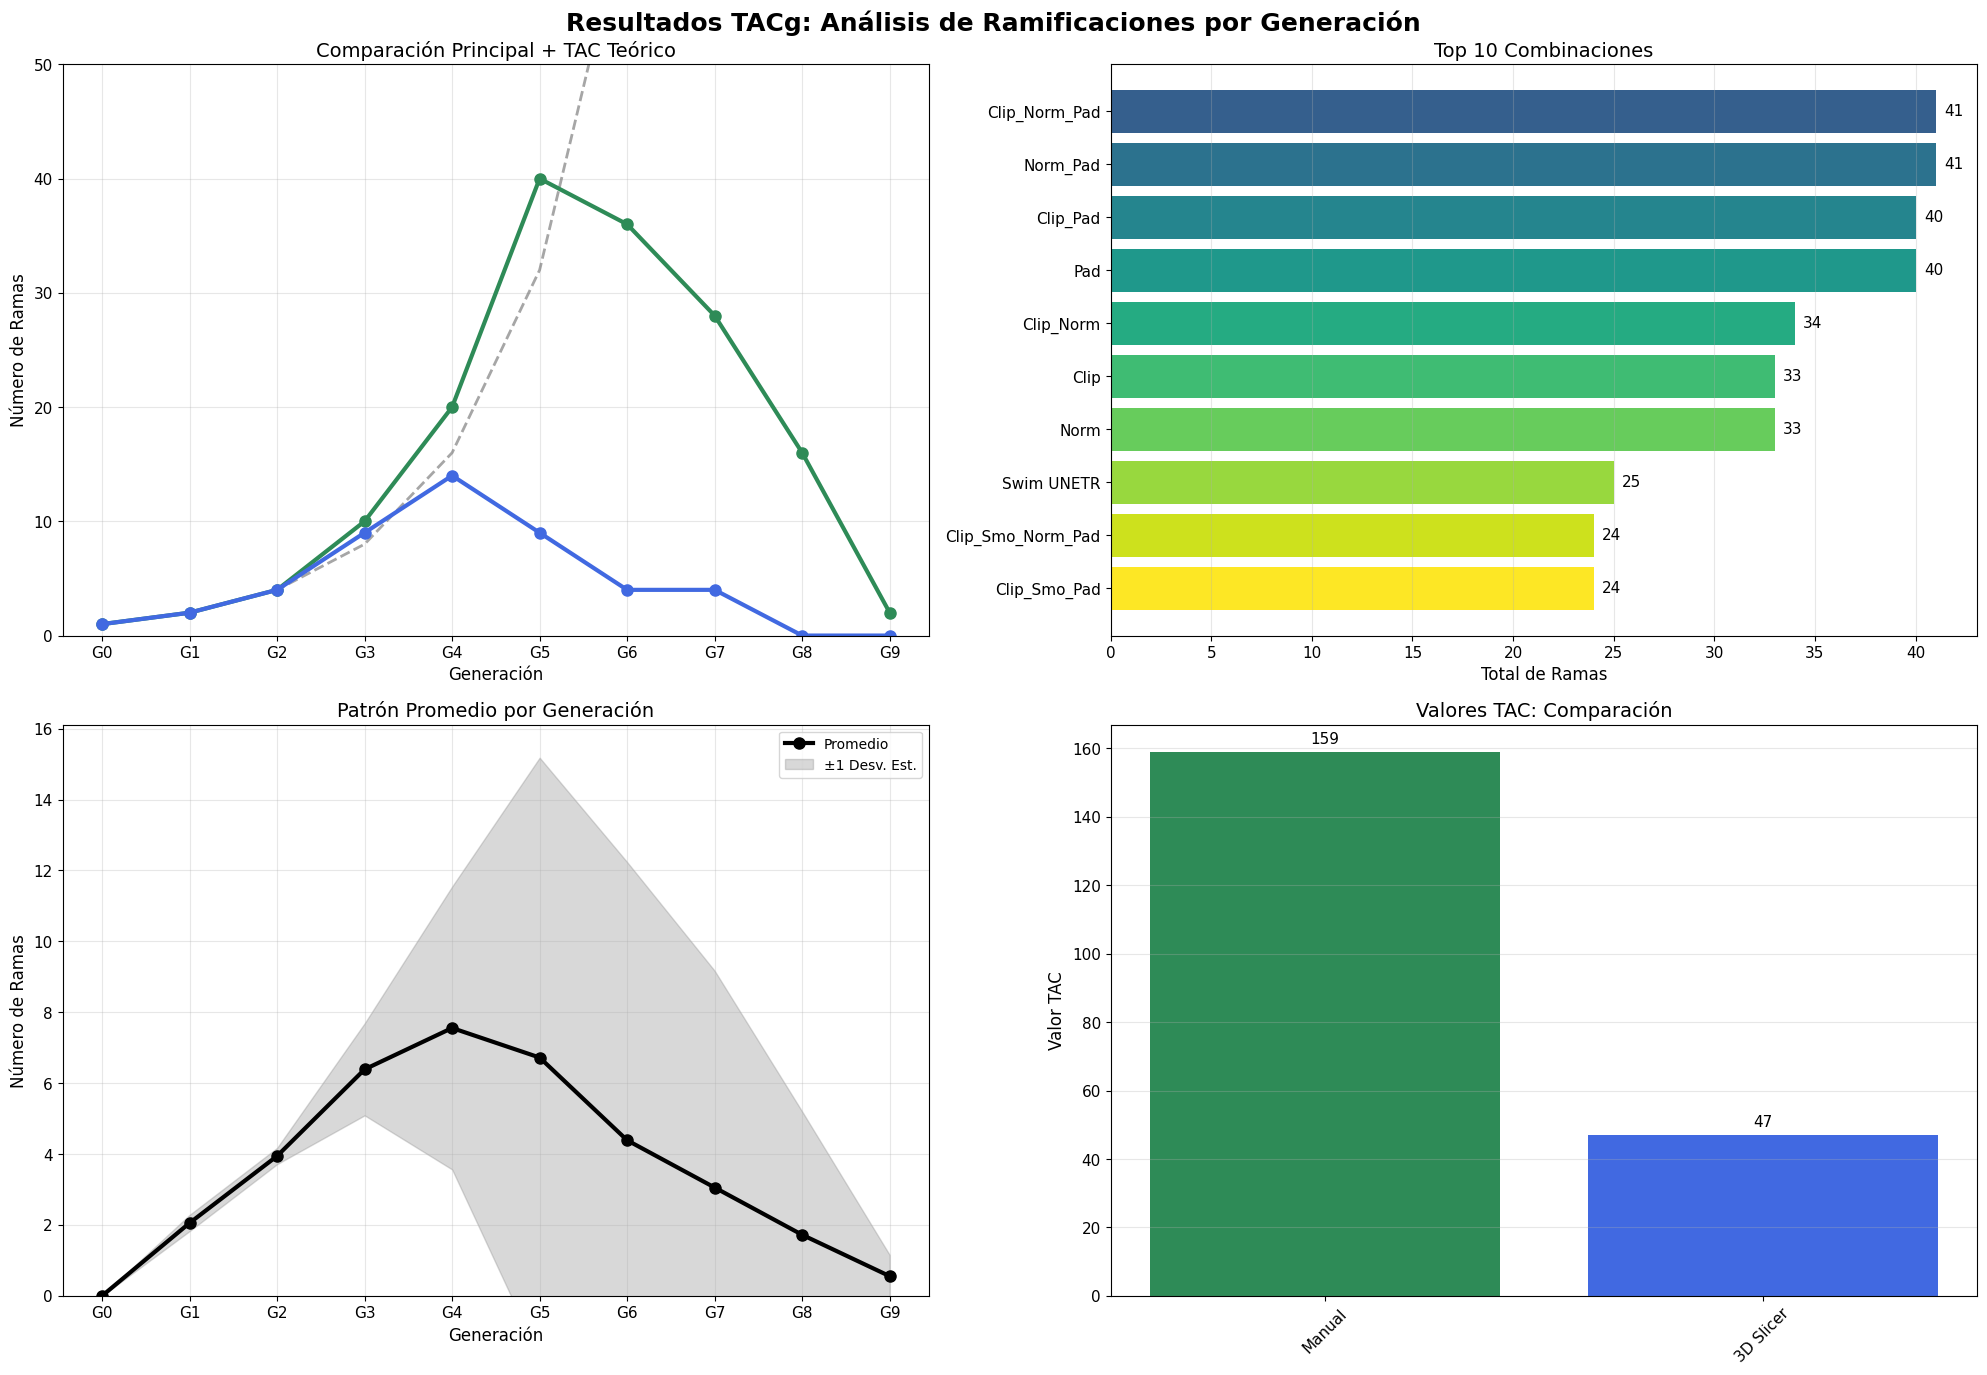


📊 Resumen de resultados:
   Métodos de comparación: 2
   Combinaciones analizadas: 16

🔍 Comparación principal:
   Manual: 159 ramas totales, hasta G9
   3D Slicer: 47 ramas totales, hasta G7

🏆 Mejor combinación: Clipped_Normalized_Padded
   Total de ramas: 41

✅ Visualización esencial completada.


C:\Users\pipea\AppData\Local\Temp\ipykernel_28616\2558474016.py:202: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  values = comparison_data.loc[method, generation_columns].fillna(0).values
C:\Users\pipea\AppData\Local\Temp\ipykernel_28616\2558474016.py:202: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  values = comparison_data.loc[method, generation_columns].fillna(0).values
C:\Users\pipea\AppData\Local\Temp\ipykernel_28616\2558474016.py:211: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a futu

In [7]:
# =========================
# Visualización Esencial de Resultados TACg + TAC Teórico
# Versión limpia: sin leyenda, sin promedios, con eje Y limitado
# =========================

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Configuración limpia
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams.update({
    'font.size': 11,
    'axes.titlesize': 14,
    'axes.labelsize': 12,
    'legend.fontsize': 10,
    'figure.titlesize': 16
})

# Verificar datos
if 'tacg_data_clean' not in globals():
    raise ValueError("❌ Ejecuta Cell 1 primero para cargar los datos de TACg.")

# === PREPARAR DATOS ===
generation_labels = [f'G{i}' for i in range(len(generation_columns))]
x_pos = np.arange(len(generation_columns))

# Filtrar métodos con datos reales
def has_real_data(row):
    if generation_columns:
        values = row[generation_columns].fillna(0)
        return values.sum() > 0
    return False

comparison_methods_valid = []
comparison_colors = ['#2E8B57', '#4169E1', '#DC143C']
for method in ['Manual', '3D Slicer', 'Automatico']:
    if method in comparison_data.index and has_real_data(comparison_data.loc[method]):
        comparison_methods_valid.append(method)

combination_methods_valid = []
for method in combination_data.index:
    if has_real_data(combination_data.loc[method]):
        combination_methods_valid.append(method)

# === AGREGAR CURVA TEÓRICA ===
theoretical_values = [2**g for g in x_pos]  # G0:1, G1:2, ..., G9:512

# === FIGURA PRINCIPAL: VISUALIZACIÓN ESENCIAL ===
fig, axes = plt.subplots(2, 2, figsize=(20, 14))
fig.suptitle('Resultados TACg: Análisis de Ramificaciones por Generación', 
             fontsize=18, fontweight='bold')

# Panel 1: Comparación principal + TEÓRICO → LIMPIO
ax1 = axes[0, 0]
if comparison_methods_valid:
    # Curva teórica (gris claro)
    ax1.plot(x_pos, theoretical_values, 
             color='gray', linestyle='--', linewidth=2, alpha=0.7)
    
    # Métodos reales (sin leyenda, sin promedios)
    for idx, method in enumerate(comparison_methods_valid):
        values = comparison_data.loc[method, generation_columns].fillna(0).values
        color = comparison_colors[idx]
        ax1.plot(x_pos, values, marker='o', linewidth=3, markersize=8, 
                color=color)
    
    ax1.set_xlabel('Generación')
    ax1.set_ylabel('Número de Ramas')
    ax1.set_title('Comparación Principal + TAC Teórico')
    ax1.set_xticks(x_pos)
    ax1.set_xticklabels(generation_labels)
    ax1.grid(True, alpha=0.3)
    ax1.set_ylim(bottom=0, top=50)  
else:
    ax1.text(0.5, 0.5, 'No hay datos', ha='center', va='center', transform=ax1.transAxes)
    ax1.set_title('Comparación Principal + TAC Teórico')

# Panel 2: Top 10 combinaciones (sin cambios)
ax2 = axes[0, 1]
if combination_methods_valid:
    totals = []
    for method in combination_methods_valid:
        values = combination_data.loc[method, generation_columns].fillna(0).values
        totals.append(np.sum(values))
    
    combined = list(zip(combination_methods_valid, totals))
    combined.sort(key=lambda x: x[1], reverse=True)
    top_10 = combined[:10]
    
    methods_top, totals_top = zip(*top_10)
    colors_top = plt.cm.viridis(np.linspace(0.3, 1, len(top_10)))
    
    bars = ax2.barh(range(len(top_10)), totals_top, color=colors_top)
    ax2.set_yticks(range(len(top_10)))
    
    short_names = []
    for name in methods_top:
        short_name = (name.replace('Clipped', 'Clip')
                     .replace('Smoothed', 'Smo')
                     .replace('Normalized', 'Norm')
                     .replace('Padded', 'Pad'))
        short_names.append(short_name)
    
    ax2.set_yticklabels(short_names)
    ax2.set_xlabel('Total de Ramas')
    ax2.set_title('Top 10 Combinaciones')
    ax2.invert_yaxis()
    
    for i, total in enumerate(totals_top):
        ax2.text(total + max(totals_top)*0.01, i, f'{total:.0f}', va='center')
    
    ax2.grid(True, alpha=0.3, axis='x')
else:
    ax2.text(0.5, 0.5, 'No hay combinaciones', ha='center', va='center', transform=ax2.transAxes)
    ax2.set_title('Top 10 Combinaciones')

# Panel 3: Patrón promedio por generación (sin cambios)
ax3 = axes[1, 0]
if generation_columns:
    all_methods = comparison_methods_valid + combination_methods_valid
    if all_methods:
        avg_values = []
        std_values = []
        for gen_col in generation_columns:
            gen_data = []
            for method in all_methods:
                if method in tacg_data_clean.index:
                    value = tacg_data_clean.loc[method, gen_col]
                    if pd.notna(value):
                        gen_data.append(value)
            if gen_col:
                avg_values.append(np.mean(gen_data))
                std_values.append(np.std(gen_data))
            else:
                avg_values.append(0)
                std_values.append(0)
        
        line, = ax3.plot(x_pos, avg_values, 'ko-', linewidth=3, markersize=8, label='Promedio')
        ax3.fill_between(x_pos, 
                        np.array(avg_values) - np.array(std_values),
                        np.array(avg_values) + np.array(std_values),
                        alpha=0.3, color='gray', label='±1 Desv. Est.')
        
        ax3.set_xlabel('Generación')
        ax3.set_ylabel('Número de Ramas')
        ax3.set_title('Patrón Promedio por Generación')
        ax3.set_xticks(x_pos)
        ax3.set_xticklabels(generation_labels)
        ax3.legend()
        ax3.grid(True, alpha=0.3)
        ax3.set_ylim(bottom=0)
    else:
        ax3.text(0.5, 0.5, 'No hay datos', ha='center', va='center', transform=ax3.transAxes)
        ax3.set_title('Patrón Promedio por Generación')
else:
    ax3.text(0.5, 0.5, 'No hay generaciones', ha='center', va='center', transform=ax3.transAxes)
    ax3.set_title('Patrón Promedio por Generación')

# Panel 4: Valores TAC (sin cambios)
ax4 = axes[1, 1]
if tac_column is not None:
    tac_comparison = []
    methods_comparison = []
    for method in comparison_methods_valid:
        value = tacg_data_clean.loc[method, tac_column]
        if pd.notna(value):
            tac_comparison.append(value)
            methods_comparison.append(method)
    
    if tac_comparison:
        bars = ax4.bar(methods_comparison, tac_comparison, 
                      color=comparison_colors[:len(tac_comparison)])
        ax4.set_ylabel('Valor TAC')
        ax4.set_title('Valores TAC: Comparación')
        ax4.tick_params(axis='x', rotation=45)
        
        for bar, value in zip(bars, tac_comparison):
            ax4.text(bar.get_x() + bar.get_width()/2., bar.get_height() + max(tac_comparison)*0.01,
                    f'{value:.0f}', ha='center', va='bottom')
        
        ax4.grid(True, alpha=0.3, axis='y')
    else:
        ax4.text(0.5, 0.5, 'TAC no disponible', ha='center', va='center', transform=ax4.transAxes)
        ax4.set_title('Valores TAC: Comparación')
else:
    ax4.text(0.5, 0.5, 'Columna TAC no encontrada', ha='center', va='center', transform=ax4.transAxes)
    ax4.set_title('Valores TAC: Comparación')

plt.tight_layout()
plt.show()

# === RESUMEN SIMPLE ===
print(f"\n📊 Resumen de resultados:")
print(f"   Métodos de comparación: {len(comparison_methods_valid)}")
print(f"   Combinaciones analizadas: {len(combination_methods_valid)}")

if comparison_methods_valid:
    print(f"\n🔍 Comparación principal:")
    for method in comparison_methods_valid:
        values = comparison_data.loc[method, generation_columns].fillna(0).values
        total = int(np.sum(values))
        max_gen = int(np.max(np.where(values > 0)[0])) if np.any(values > 0) else 0
        print(f"   {method}: {total} ramas totales, hasta G{max_gen}")

if combination_methods_valid:
    best_method = None
    best_total = 0
    for method in combination_methods_valid:
        values = combination_data.loc[method, generation_columns].fillna(0).values
        total = np.sum(values)
        if total > best_total:
            best_total = total
            best_method = method
    
    if best_method:
        print(f"\n🏆 Mejor combinación: {best_method}")
        print(f"   Total de ramas: {int(best_total)}")

print(f"\n✅ Visualización esencial completada.")

C:\Users\pipea\AppData\Local\Temp\ipykernel_28616\1559817924.py:56: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  values = tacg_data_clean.loc[method, generation_columns].fillna(0)
C:\Users\pipea\AppData\Local\Temp\ipykernel_28616\1559817924.py:56: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  values = tacg_data_clean.loc[method, generation_columns].fillna(0)
C:\Users\pipea\AppData\Local\Temp\ipykernel_28616\1559817924.py:56: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call 

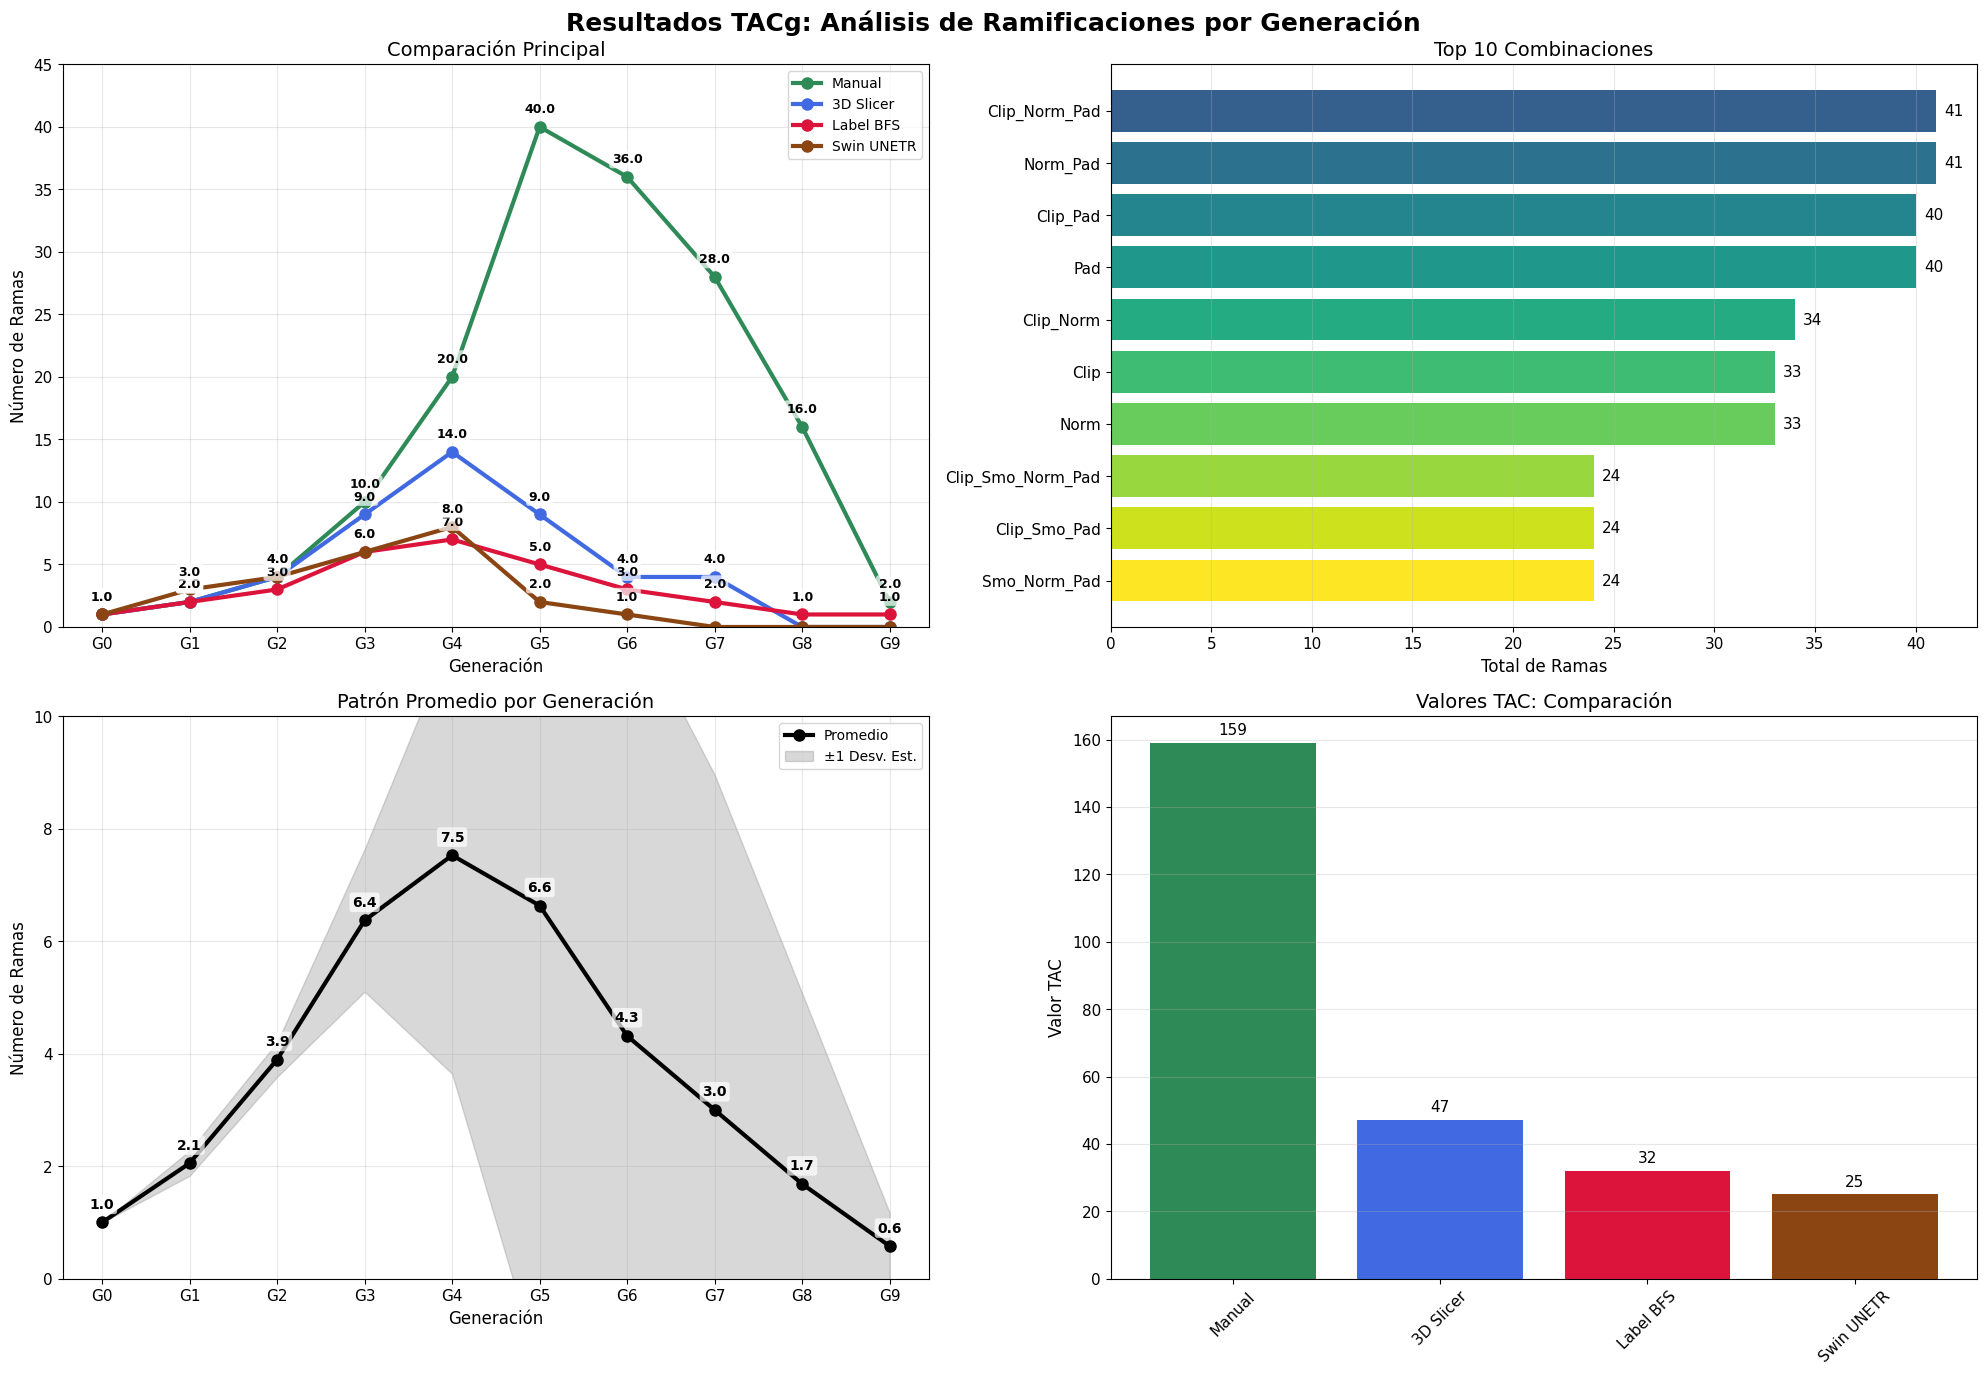


📊 Resumen de resultados:
   Métodos de comparación: 4
   Combinaciones analizadas: 15

🔍 Comparación principal:
   Manual: TAC=159, TACg peak=G5(40)
   3D Slicer: TAC=47, TACg peak=G4(14)
   Label BFS: TAC=31, TACg peak=G4(7)
   Swin UNETR: TAC=25, TACg peak=G4(8)

🏆 Mejor combinación: Clipped_Normalized_Padded
   TAC: 41, TACg peak=G4(9)

✅ Visualización esencial completada.


C:\Users\pipea\AppData\Local\Temp\ipykernel_28616\1559817924.py:249: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  values = tacg_data_clean.loc[method, generation_columns].fillna(0).values
C:\Users\pipea\AppData\Local\Temp\ipykernel_28616\1559817924.py:249: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  values = tacg_data_clean.loc[method, generation_columns].fillna(0).values
C:\Users\pipea\AppData\Local\Temp\ipykernel_28616\1559817924.py:249: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a futu

In [23]:
# =========================
# Visualización Esencial de Resultados TACg
# Enfoque limpio y directo en los resultados clave + PROMEDIOS EN COMPARACIÓN PRINCIPAL
# =========================

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import re

# Configuración limpia
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams.update({
    'font.size': 11,
    'axes.titlesize': 14,
    'axes.labelsize': 12,
    'legend.fontsize': 10,
    'figure.titlesize': 16
})

# Verificar datos
if 'tacg_data_clean' not in globals():
    raise ValueError("❌ Ejecuta la celda de carga de TACg primero para cargar los datos de TACg.")

# === FUNCIÓN PARA EXTRAER VALOR NUMÉRICO ===
def extract_numeric_value(value):
    """Extrae el valor numérico de cualquier tipo de dato"""
    if pd.isna(value):
        return np.nan
    if isinstance(value, (int, float)):
        return float(value)
    if isinstance(value, str):
        # Buscar el primer número en la cadena (incluyendo decimales)
        match = re.search(r'(\d+\.?\d*)', value)
        if match:
            return float(match.group(1))
        else:
            return np.nan
    return np.nan

# === PREPARAR DATOS ===
generation_labels = [f'G{i}' for i in range(len(generation_columns))]
x_pos = np.arange(len(generation_columns))

# === CORRECCIÓN DEFINITIVA: Buscar los métodos exactos en todos los datos ===
methods_to_show = ['Manual', '3D Slicer', 'Label BFS', 'Swin UNETR']
comparison_methods_valid = []
comparison_colors = ['#2E8B57', '#4169E1', '#DC143C', '#8B4513']

# Buscar cada método en todos los datos disponibles
for method in methods_to_show:
    if method in tacg_data_clean.index:
        # Verificar que tenga datos reales en las generaciones
        values = tacg_data_clean.loc[method, generation_columns].fillna(0)
        if values.sum() > 0:
            comparison_methods_valid.append(method)

# Para combinaciones, excluir los métodos de comparación
combination_methods_valid = []
for method in tacg_data_clean.index:
    if method not in methods_to_show:
        values = tacg_data_clean.loc[method, generation_columns].fillna(0)
        if values.sum() > 0:
            combination_methods_valid.append(method)

# === FIGURA PRINCIPAL: VISUALIZACIÓN ESENCIAL ===
fig, axes = plt.subplots(2, 2, figsize=(20, 14))
fig.suptitle('Resultados TACg: Análisis de Ramificaciones por Generación', 
             fontsize=18, fontweight='bold')

# Panel 1: Comparación principal (Manual vs 3D Slicer vs Label BFS vs Swin UNETR) → ¡CON PROMEDIOS!
ax1 = axes[0, 0]
if comparison_methods_valid:
    for idx, method in enumerate(comparison_methods_valid):
        values = tacg_data_clean.loc[method, generation_columns].fillna(0).values
        color = comparison_colors[idx]
        ax1.plot(x_pos, values, marker='o', linewidth=3, markersize=8, 
                color=color, label=method)
        
        # === AGREGAR PROMEDIOS EN NEGRO ===
        for x, y in zip(x_pos, values):
            if y > 0.5:  # Solo mostrar si es significativo
                ax1.annotate(
                    f'{y:.1f}',
                    (x, y),
                    textcoords="offset points",
                    xytext=(0, 8),
                    ha='center',
                    va='bottom',
                    fontsize=9,
                    color='black',
                    weight='bold',
                    bbox=dict(boxstyle="round,pad=0.2", fc="white", ec="none", alpha=0.7)
                )
    
    ax1.set_xlabel('Generación')
    ax1.set_ylabel('Número de Ramas')
    ax1.set_title('Comparación Principal')
    ax1.set_xticks(x_pos)
    ax1.set_xticklabels(generation_labels)
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    ax1.set_ylim(bottom=0, top=45)  # Límite superior ajustado a tus datos
else:
    ax1.text(0.5, 0.5, 'No hay datos', ha='center', va='center', transform=ax1.transAxes)
    ax1.set_title('Comparación Principal')

# Panel 2: Top 10 combinaciones
ax2 = axes[0, 1]
if combination_methods_valid:
    totals = []
    for method in combination_methods_valid:
        values = tacg_data_clean.loc[method, generation_columns].fillna(0).values
        totals.append(np.sum(values))
    
    combined = list(zip(combination_methods_valid, totals))
    combined.sort(key=lambda x: x[1], reverse=True)
    top_10 = combined[:10]
    
    methods_top, totals_top = zip(*top_10)
    colors_top = plt.cm.viridis(np.linspace(0.3, 1, len(top_10)))
    
    bars = ax2.barh(range(len(top_10)), totals_top, color=colors_top)
    ax2.set_yticks(range(len(top_10)))
    
    short_names = []
    for name in methods_top:
        short_name = (name.replace('Clipped', 'Clip')
                     .replace('Smoothed', 'Smo')
                     .replace('Normalized', 'Norm')
                     .replace('Padded', 'Pad'))
        short_names.append(short_name)
    
    ax2.set_yticklabels(short_names)
    ax2.set_xlabel('Total de Ramas')
    ax2.set_title('Top 10 Combinaciones')
    ax2.invert_yaxis()
    
    for i, total in enumerate(totals_top):
        ax2.text(total + max(totals_top)*0.01, i, f'{total:.0f}', va='center')
    
    ax2.grid(True, alpha=0.3, axis='x')
else:
    ax2.text(0.5, 0.5, 'No hay combinaciones', ha='center', va='center', transform=ax2.transAxes)
    ax2.set_title('Top 10 Combinaciones')

# Panel 3: Patrón promedio por generación
ax3 = axes[1, 0]
if generation_columns:
    all_methods = comparison_methods_valid + combination_methods_valid
    if all_methods:
        avg_values = []
        std_values = []
        for gen_col in generation_columns:
            gen_data = []
            for method in all_methods:
                if method in tacg_data_clean.index:
                    value = tacg_data_clean.loc[method, gen_col]
                    if pd.notna(value):
                        gen_data.append(value)
            if gen_data:
                avg_values.append(np.mean(gen_data))
                std_values.append(np.std(gen_data))
            else:
                avg_values.append(0)
                std_values.append(0)
        
        line, = ax3.plot(x_pos, avg_values, 'ko-', linewidth=3, markersize=8, label='Promedio')
        ax3.fill_between(x_pos, 
                        np.array(avg_values) - np.array(std_values),
                        np.array(avg_values) + np.array(std_values),
                        alpha=0.3, color='gray', label='±1 Desv. Est.')
        
        # Etiquetas de promedio en Panel 3
        for x, y in zip(x_pos, avg_values):
            if y > 0.5:
                ax3.annotate(
                    f'{y:.1f}',
                    (x, y),
                    textcoords="offset points",
                    xytext=(0, 8),
                    ha='center',
                    va='bottom',
                    fontsize=10,
                    color='black',
                    weight='bold',
                    bbox=dict(boxstyle="round,pad=0.2", fc="white", ec="none", alpha=0.7)
                )
        
        ax3.set_xlabel('Generación')
        ax3.set_ylabel('Número de Ramas')
        ax3.set_title('Patrón Promedio por Generación')
        ax3.set_xticks(x_pos)
        ax3.set_xticklabels(generation_labels)
        ax3.legend()
        ax3.grid(True, alpha=0.3)
        ax3.set_ylim(bottom=0, top=10)  # Límite superior ajustado
    else:
        ax3.text(0.5, 0.5, 'No hay datos', ha='center', va='center', transform=ax3.transAxes)
        ax3.set_title('Patrón Promedio por Generación')
else:
    ax3.text(0.5, 0.5, 'No hay generaciones', ha='center', va='center', transform=ax3.transAxes)
    ax3.set_title('Patrón Promedio por Generación')

# Panel 4: Valores TAC (CORREGIDO)
ax4 = axes[1, 1]
if tac_column is not None:
    tac_comparison = []
    methods_comparison = []
    for method in comparison_methods_valid:
        value = tacg_data_clean.loc[method, tac_column]
        numeric_value = extract_numeric_value(value)  # EXTRAER VALOR NUMÉRICO
        if not pd.isna(numeric_value):
            tac_comparison.append(numeric_value)
            methods_comparison.append(method)
    
    if tac_comparison:
        bars = ax4.bar(methods_comparison, tac_comparison, 
                      color=comparison_colors[:len(tac_comparison)])
        ax4.set_ylabel('Valor TAC')
        ax4.set_title('Valores TAC: Comparación')
        ax4.tick_params(axis='x', rotation=45)
        
        for bar, value in zip(bars, tac_comparison):
            ax4.text(bar.get_x() + bar.get_width()/2., bar.get_height() + max(tac_comparison)*0.01,
                    f'{value:.0f}', ha='center', va='bottom')
        
        ax4.grid(True, alpha=0.3, axis='y')
    else:
        ax4.text(0.5, 0.5, 'TAC no disponible', ha='center', va='center', transform=ax4.transAxes)
        ax4.set_title('Valores TAC: Comparación')
else:
    ax4.text(0.5, 0.5, 'Columna TAC no encontrada', ha='center', va='center', transform=ax4.transAxes)
    ax4.set_title('Valores TAC: Comparación')

plt.tight_layout()
plt.show()

# === RESUMEN SIMPLE ===
print(f"\n📊 Resumen de resultados:")
print(f"   Métodos de comparación: {len(comparison_methods_valid)}")
print(f"   Combinaciones analizadas: {len(combination_methods_valid)}")

if comparison_methods_valid:
    print(f"\n🔍 Comparación principal:")
    for method in comparison_methods_valid:
        values = tacg_data_clean.loc[method, generation_columns].fillna(0).values
        total = int(np.sum(values))
        # Encontrar la generación con el valor máximo
        max_val = np.max(values)
        max_gen_idx = np.argmax(values)
        print(f"   {method}: TAC={total}, TACg peak=G{max_gen_idx}({int(max_val)})")

if combination_methods_valid:
    best_method = None
    best_total = 0
    for method in combination_methods_valid:
        values = tacg_data_clean.loc[method, generation_columns].fillna(0).values
        total = np.sum(values)
        if total > best_total:
            best_total = total
            best_method = method
    
    if best_method:
        values_best = tacg_data_clean.loc[best_method, generation_columns].fillna(0).values
        max_val_best = np.max(values_best)
        max_gen_best = np.argmax(values_best)
        print(f"\n🏆 Mejor combinación: {best_method}")
        print(f"   TAC: {int(best_total)}, TACg peak=G{max_gen_best}({int(max_val_best)})")

print(f"\n✅ Visualización esencial completada.")